# Trabajo 2

Autor: David Delgado Bejarano

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


## Carga de Dataset

Este dataset, obtenido de [UCI ML Repository](https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008). El dataset abarca diez años de registros médicos en múltiples hospitales de EE.UU., centrados en pacientes diabéticos y su posible readmisión hospitalaria. El objetivo es predecir si un paciente será readmitido en menos de 30 días, en más de 30 días, o si no requerirá readmisión a corto plazo, lo cual permite mejorar la atención que reciben los pacientes una vez que ingresan por primera vez, evitando altas erróneas.

Cargamos el dataset. 

El na_values indica que se interprete el ? como NaN, ya que los datos iriginales mezcla el NaN con el ? para indicar valores faltantes.

In [68]:

df = pd.read_csv("data/diabetic_data.csv",na_values='?')


C:\Users\Asus\AppData\Local\Temp\ipykernel_5776\239421291.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("diabetes+130-us+hospitals+for+years+1999-2008/diabetic_data.csv",na_values='?')


El aviso nos dice que la columna 10 tiene valores mezclados, de ? con otros valores en la misma columna, algo esperable.

## Preprocesado de datos

Miramos el dataset:

In [69]:
print(df.shape)
df[:20]


(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [70]:
a=df.shape
df.columns,print(a)

(101766, 50)


(Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
        'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
        'time_in_hospital', 'payer_code', 'medical_specialty',
        'num_lab_procedures', 'num_procedures', 'num_medications',
        'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
        'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
        'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
        'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
        'tolazamide', 'examide', 'citoglipton', 'insulin',
        'glyburide-metformin', 'glipizide-metformin',
        'glimepiride-pioglitazone', 'metformin-rosiglitazone',
        'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
       dtype='object'),
 None)

Eliminamos las dos primeras columnas, pues mirando la documentación, son valores unicos sobre el ingreso de los clientes. Además, también eliminamos 'payer_code', que indica cómo pago el seguro médico del cliente:

In [71]:
df.drop(['encounter_id','patient_nbr','payer_code'],axis=1,inplace=True)

Vemos cuántos valores faltan y en qué columnas:

In [72]:
df.isnull().sum()

race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide   

Segun la instruccion de arriba, faltan valores en 9 de las 50 columnas. Vemos qué porcentaje de todos los datos faltan en cada columna:

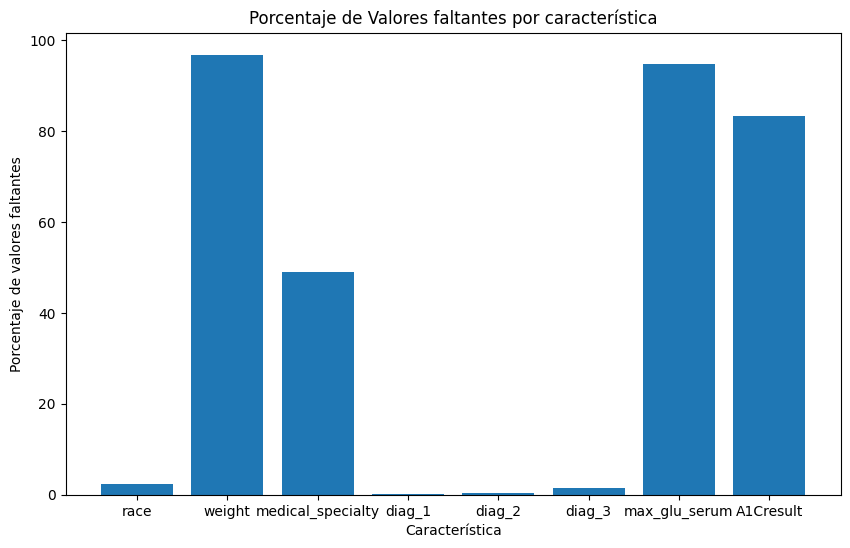

In [73]:
porcentajes=[]
columnas=[]

for columna in df.columns:
    b=df[columna].isnull().sum()
    if b > 0:
        porcentaje=b / df.shape[0]*100
        porcentajes.append(porcentaje)
        columnas.append(columna)

plt.figure(figsize=(10, 6))
plt.bar(columnas,porcentajes)
plt.xlabel('Característica')
plt.ylabel('Porcentaje de valores faltantes')
plt.title('Porcentaje de Valores faltantes por característica')
plt.show()

En las columnas en las que faltan pocos datos (hasta un 50%), reemplazaremos estos valores faltantes. Otras, como weight, max_glu_serum y A1Cresult serán eliminadas directamente, pues faltan la mayoría de sus valores, con lo que la representatividad de esa columna es muy baja, y hacer una imputación es complicado (podríamos añadir ruido y perjudicar el rendimiento). Aunque valores variables como el peso sean importantes al hablar de diabetes, no tenemos datos suficientes para tenerlos en cuenta. 

In [74]:
df.drop(["weight","max_glu_serum","A1Cresult"],axis=1,inplace=True)

Para las columnas donde faltan muy pocos datos, eliminamos las instancias donde faltan, porque, además de ser datos de tipo categórico (con lo que no se puede usar métodos estadísticos, solo la moda) no se afecta significativamente al tamaño del conjunto y además evitamos añadir cualquier sesgo que se pueda introducir al imputar, quedándonos solo con instancias reales y completas.

In [75]:
columnas_borra_instancia=['race','diag_1','diag_2','diag_3']

indices_eliminar=[]
for i in range(df.shape[0]):
    fila = df.iloc[i]
    if any(pd.isnull(fila[columna]) for columna in columnas_borra_instancia):
        indices_eliminar.append(i)

df.drop(indices_eliminar,inplace=True)

Vemos ahora qué variables nos queda con datos faltantes:

In [76]:
for column in df.columns:
    b=df[column].isnull().sum()
    if b>0:
        print(column, b/df.shape[0]*100)


medical_specialty 49.27743159311801


Ya solo nos queda tratar con medical speciality, que tiene valores categóricos.

In [77]:
df[['medical_specialty']].dtypes

medical_specialty    object
dtype: object

Antes de tratarla e imputar sus valores, pues no puedo eliminarlos al faltar un 50% y además es importante pues indica de qué especialidad es el médico que trata al paciente en primera instancia, vamos a estudiar cómo sustituir en el df los valores categóricos por numéricos, para así poder después entrenar a los modelos.

### Sustitucion categoricos por numericos

Vemos qué tipo de datos tiene cada variable:

In [78]:
df.dtypes

race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone       

Primero vemos si hay hay variables categoricas ordinales, y asi asignarle un valor numerico, o si hay variables binarias, y asignarle 0 y 1. También, vemos cómo en las siguientes columnas hay muy pocos valores categoricos, siendo la mayoría numéricos:


In [79]:
df['diag_1'].value_counts(),df['diag_2'].value_counts(),df['diag_3'].value_counts()

(diag_1
 428    6730
 414    6374
 786    3900
 410    3514
 486    3412
        ... 
 216       1
 V43       1
 838       1
 955       1
 V51       1
 Name: count, Length: 713, dtype: int64,
 diag_2
 428    6517
 276    6513
 250    5412
 427    4919
 401    3613
        ... 
 316       1
 963       1
 506       1
 944       1
 927       1
 Name: count, Length: 740, dtype: int64,
 diag_3
 250    11208
 401     8090
 276     5097
 428     4491
 427     3865
        ...  
 657        1
 992        1
 732        1
 951        1
 971        1
 Name: count, Length: 786, dtype: int64)

Se ve que en estas columnas hay valores que empiezan por letras, más concretamente en E y V:

In [80]:
diag1 = df[df['diag_1'].str.startswith(('V', 'E'))]['diag_1']
diag2 = df[df['diag_2'].str.startswith(('V', 'E'))]['diag_2']
diag3 = df[df['diag_3'].str.startswith(('V', 'E'))]['diag_3']

diag1.value_counts().sum(),diag2.value_counts().sum(),diag3.value_counts().sum()

(1601, 2451, 4974)

Es decir, de las 98000 filas, solo tienen estos valores categoricos un numero muy bajo. Estas letras y números se enmarcan en el [Código ICD9](https://es.wikipedia.org/wiki/CIE-9), un sistema de codificación utilizado para clasificar enfermedades y procedimientos médicos. Aunque podríamos eliminar esas instancias, vamos a probar a hacer un one-hot. 

In [81]:
df_oh_prueba = pd.get_dummies(df, columns=['diag_1', 'diag_2', 'diag_3'], dtype=int)
df_oh_prueba.shape,a

((98053, 2280), (101766, 50))

Como vemos, esto es inviable, pues hemos aumentado la dimensionalidad en mas de 2000 variables. La solucion que queda es eliminar las instancias con V y E, lo que no afecta mucho al conjunto pues son pocas instancias las que tienen estos codigos que empiezan por letras. Así, estas variables pasarán a ser numéricas:

In [82]:
df = df[~df['diag_1'].str.startswith(('V', 'E'))]
df = df[~df['diag_2'].str.startswith(('V', 'E'))]
df = df[~df['diag_3'].str.startswith(('V', 'E'))]

df['diag_1'] = df['diag_1'].astype('float')
df['diag_2'] = df['diag_2'].astype('float')
df['diag_3'] = df['diag_3'].astype('float')

A la variable 'gender' le asignamos valores binarios

In [83]:
df['gender'].value_counts()

gender
Female             48446
Male               41335
Unknown/Invalid        1
Name: count, dtype: int64

In [84]:
df.loc[df['gender'] == 'Male', 'gender'] = 0
df.loc[df['gender'] != 0, 'gender'] = 1

In [85]:
df['gender'].value_counts()

gender
1    48447
0    41335
Name: count, dtype: int64

Seguimos explorando y vemos como hay varias columnas categóricas pero ordinales en este caso. Las siguientes columnas son medicinas recetadas a estos pacientes. Sus posibles valores son:

- up: si la dosis se aumentó durante la consulta.
- down: si la dosis se disminuyó durante la consulta.
- steady: si la dosis no cambió durante la consulta.
- no: si el medicamento no fue recetado.

por lo que un orden lógico parece:

- up: 3
- steady: 2
- down: 1
- no: 0


In [86]:
for columna in df.columns[18:-3]:
    print(df[columna].value_counts())

metformin
No        72323
Steady    16036
Up          928
Down        495
Name: count, dtype: int64
repaglinide
No        88358
Steady     1282
Up          100
Down         42
Name: count, dtype: int64
nateglinide
No        89149
Steady      607
Up           16
Down         10
Name: count, dtype: int64
chlorpropamide
No        89705
Steady       70
Up            6
Down          1
Name: count, dtype: int64
glimepiride
No        85167
Steady     4150
Up          297
Down        168
Name: count, dtype: int64
acetohexamide
No        89781
Steady        1
Name: count, dtype: int64
glipizide
No        78552
Steady    10024
Up          699
Down        507
Name: count, dtype: int64
glyburide
No        80414
Steady     8139
Up          721
Down        508
Name: count, dtype: int64
tolbutamide
No        89762
Steady       20
Name: count, dtype: int64
pioglitazone
No        83352
Steady     6123
Up          205
Down        102
Name: count, dtype: int64
rosiglitazone
No        84134
Steady     542

In [87]:
df.iloc[:,18:-3]=df.iloc[:,18:-3].replace({'No': 0, 'Up': 3, 'Down':1, 'Steady':2})

Vemos ahora qué ocurre con las ultimas dos variables:

In [88]:
df['change'].value_counts(),df['diabetesMed'].value_counts()

(change
 No    48267
 Ch    41515
 Name: count, dtype: int64,
 diabetesMed
 Yes    69007
 No     20775
 Name: count, dtype: int64)

Como vemos son binarios, sustituimos por 0 y 1:

In [89]:
df.iloc[:,[-3,-2]]=df.iloc[:,[-3,-2]].replace({'No': 0, 'Ch': 1, 'Yes':1})

Ya solo no queda age, race y medical specialty (esta aun con NaN) con valores categoricos:

In [90]:
df['age'].value_counts(),df['race'].value_counts(),df['medical_specialty'].value_counts()

(age
 [70-80)     23204
 [60-70)     19947
 [80-90)     15453
 [50-60)     15232
 [40-50)      8470
 [30-40)      3204
 [90-100)     2556
 [20-30)      1285
 [10-20)       375
 [0-10)         56
 Name: count, dtype: int64,
 race
 Caucasian          68570
 AfricanAmerican    17447
 Hispanic            1835
 Other               1352
 Asian                578
 Name: count, dtype: int64,
 medical_specialty
 InternalMedicine                 13019
 Emergency/Trauma                  7070
 Family/GeneralPractice            6733
 Cardiology                        4791
 Surgery-General                   2647
                                  ...  
 Proctology                           1
 Perinatology                         1
 Neurophysiology                      1
 Psychiatry-Addictive                 1
 Pediatrics-InfectiousDiseases        1
 Name: count, Length: 71, dtype: int64)

Podemos verlo en un gráfico para las dos primeras

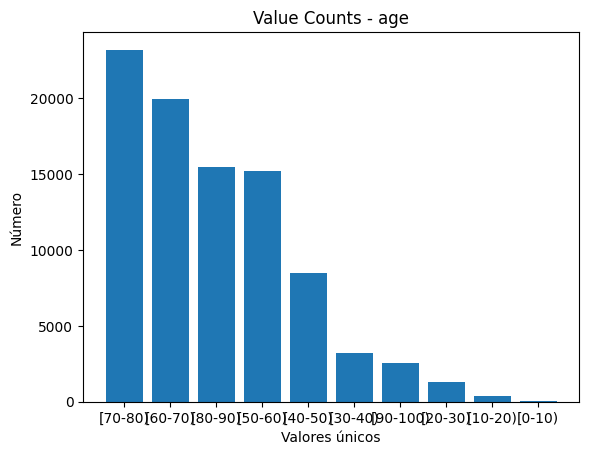

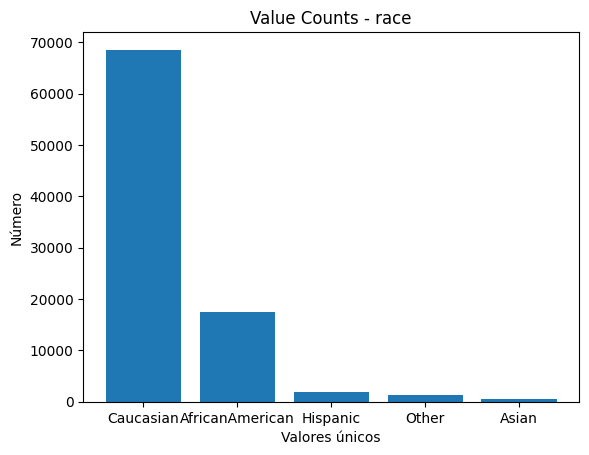

In [91]:
plt.figure()
plt.bar(df['age'].value_counts().index, df['age'].value_counts().values)
plt.xlabel('Valores únicos')
plt.ylabel('Número')
plt.title('Value Counts - age')

plt.figure()
plt.bar(df['race'].value_counts().index, df['race'].value_counts().values)
plt.xlabel('Valores únicos')
plt.ylabel('Número')
plt.title('Value Counts - race')



plt.show()

Como vemos, el ingreso es mayoritario de personas mayores, y de raza caucásico (aunque esto debe ser normalizado a la población de los lugares de los hospitales). Puede haber dudas de si la raza es una variable importante o representativa, de momento vamos a considerarla y no la eliminaremos.

En la primera, 'age', tenemos una ordinalidad clara, por tanto sutituimos:

In [92]:
df['age']=df['age'].replace({'[0-10)':10,'[10-20)':20,'[20-30)':30,'[30-40)':40,'[40-50)':50,'[50-60)':60,'[60-70)':70,'[70-80)':80,'[80-90)':90,'[90-100)':100})

En la segunda, 'race', al no haber ninguna ordinalidad, y no ser binaria, la pasaremos a one hot. La de medical specialty la trataremos más adelante, ya que aún faltan valores.

In [93]:
df_oh = pd.get_dummies(df, columns=['race'],dtype=int)

Así hemos convertido los datos categoricos a numericos, intentando no disparar la dimensionalidad, por eso no se ha realizado el one hot desde el principio, si no se ha estudiado qué valores había en cada columna. De haber ejecutado el one hot de primeras, la dimensionalidad se habría multiplicado por miles, lo cual es inmanejable. Finalmente, entre columnas eliminadas (-6) y one-hot (+4), hemos reducido la dimensionalidad en 2 variables, lo cual es bueno.

In [94]:
print("Dimensión inicial: {}".format(a))
print("Dimensión actual: {}".format(df_oh.shape))

Dimensión inicial: (101766, 50)
Dimensión actual: (89782, 48)


### Imputación categoricos

En la unica columna que queda con valores categoricos, vamos a imputar según la moda de la columna:

In [95]:
df1=df_oh.copy()
y=df1.pop('readmitted')
X=df1

In [96]:
columnas_imputar=['medical_specialty']

for columna in columnas_imputar:
    X[columna].fillna(X[columna].mode()[0] , inplace=True) 

Ahora no tendríamos ningún valor faltante en nuestros datos. Lo siguiente es tratar con los valores categoricos de la columna medical_specialty, pues son los unicos que nos quedan.

In [97]:
X['medical_specialty'].unique(),len(X['medical_specialty'].unique())

(array(['InternalMedicine', 'Family/GeneralPractice', 'Cardiology',
        'Surgery-General', 'Orthopedics', 'Gastroenterology',
        'Surgery-Cardiovascular/Thoracic', 'Nephrology',
        'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
        'Pulmonology', 'Obsterics&Gynecology-GynecologicOnco',
        'ObstetricsandGynecology', 'Otolaryngology',
        'Pediatrics-Endocrinology', 'Surgery-Colon&Rectal',
        'Surgery-Neuro', 'Endocrinology', 'Hematology/Oncology', 'Urology',
        'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
        'Pediatrics', 'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
        'Pediatrics-CriticalCare', 'Pediatrics-Hematology-Oncology',
        'Podiatry', 'Gynecology', 'Pediatrics-Neurology',
        'Surgery-Plastic', 'Surgery-Thoracic',
        'Surgery-PlasticwithinHeadandNeck', 'Psychology', 'Ophthalmology',
        'Surgery-Pediatric', 'InfectiousDiseases',
        'PhysicalMedicineandRehabilitation', 'An

Como vemos, tenemos 71 posibles valores para esta columna, con lo cual, al no haber ordinalidad, lo único que podemos hacer es one-hot. Aún así, también vamos a pasarlos a valores numéricos directamente, aunque introduzcamos un orden ímplicito, a ver qué obtenemos.

In [98]:
X_oh = pd.get_dummies(X, columns=['medical_specialty'],dtype=int)
X_oh.shape
print("La dimensionalidad ha aumentado de {} a {}.".format(df_oh.shape[1],X_oh.shape[1]))

La dimensionalidad ha aumentado de 48 a 117.


Como vemos, es un aumento significativo pero dentro de unos valores normales, considerando también el número de ejemplos.

In [99]:
X_ord=X.copy()

In [100]:

for i, valor in enumerate(X_ord['medical_specialty'].unique()):
    X_ord['medical_specialty'] = X_ord['medical_specialty'].replace(valor, i)

In [101]:
X_ord.shape

(89782, 47)

De esta forma no aumentamos dimensionalidad pero introducimos ordinalidad que no había en la columna. Por ultimo codificamos la variable objetivo. Esta variable objetivo indica si un paciente ha tenido que reingresar antes de los 30 dias posteriores al alta (<30), despues de los 30 dias posteriores al alta (>30) o no ha tenido que ser reingresado. Un orden lógico sería:

- NO: 0
- '>'30: 1
- <30: 2

In [102]:
y.unique()

array(['>30', 'NO', '<30'], dtype=object)

In [103]:
y= y.replace({'>30': 1, 'NO': 0, '<30':2})

Como conlusión, tengo datos numericos (X_oh y X ord) con su variable objetivo correspondiente y, que es la misma para los dos. Ahora, para trabajar mas comodo, pasaré todos los datos, que ya son numericos, a tipo float y reordenamos los índices.

In [104]:
X_ord=X_ord.astype(float)
X_oh=X_oh.astype(float)
y=y.astype(float)

X_ord.reset_index(drop=True, inplace=True),X_oh.reset_index(drop=True, inplace=True),y.reset_index(drop=True, inplace=True)

(None, None, None)

Por último, voy a escalar los datos a media 0 y desviación estandar 1:

In [105]:
scaler = StandardScaler()

scaler.fit(X_ord)
X_ord= pd.DataFrame(scaler.transform(X_ord),columns=X_ord.columns)

scaler.fit(X_oh)
X_oh= pd.DataFrame(scaler.transform(X_oh),columns=X_oh.columns)


## Visualizacion gráfica y selección de características

### Boxplots

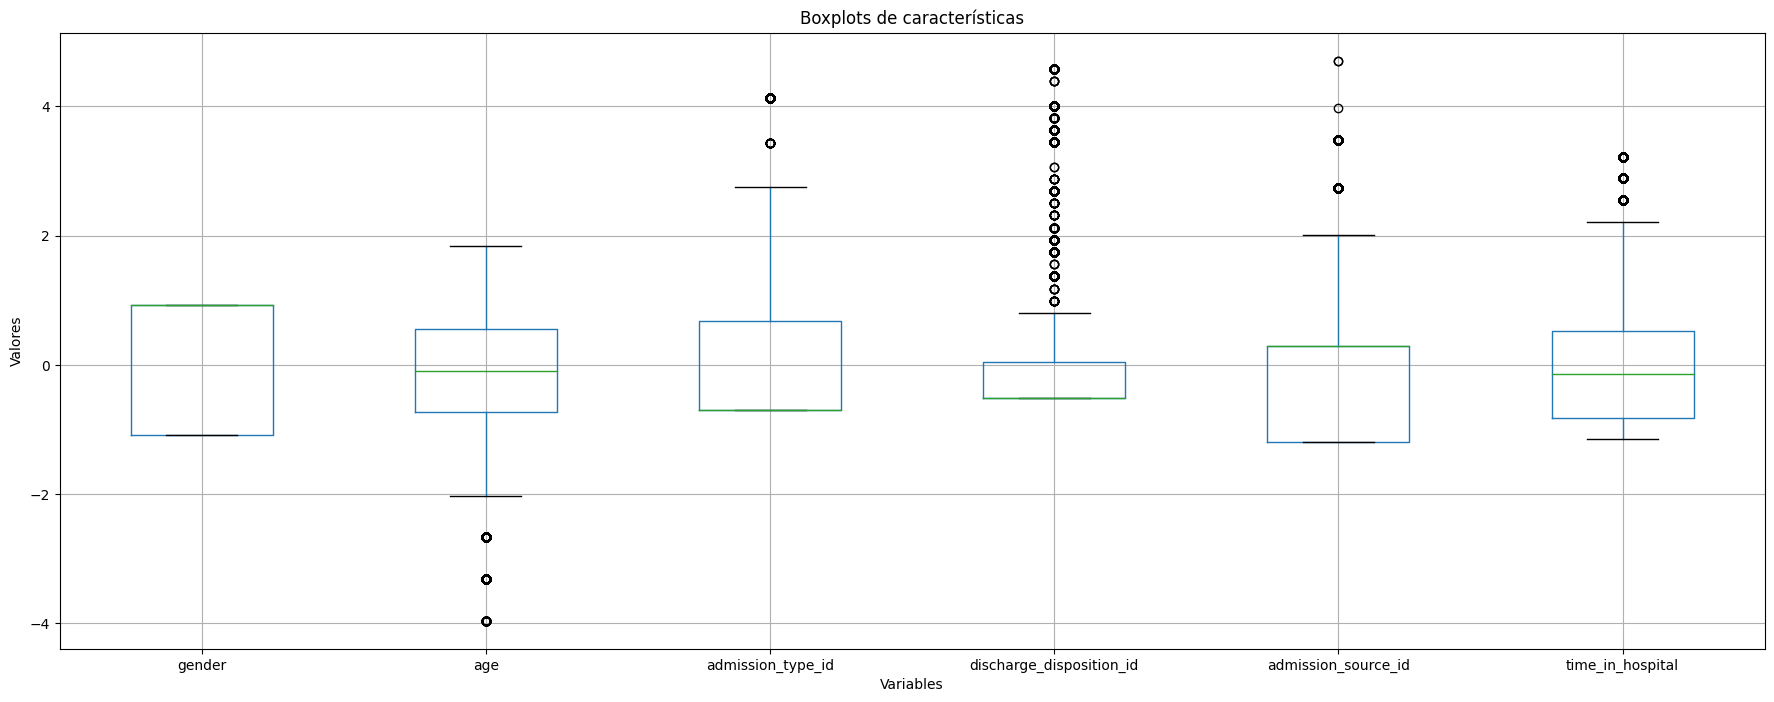

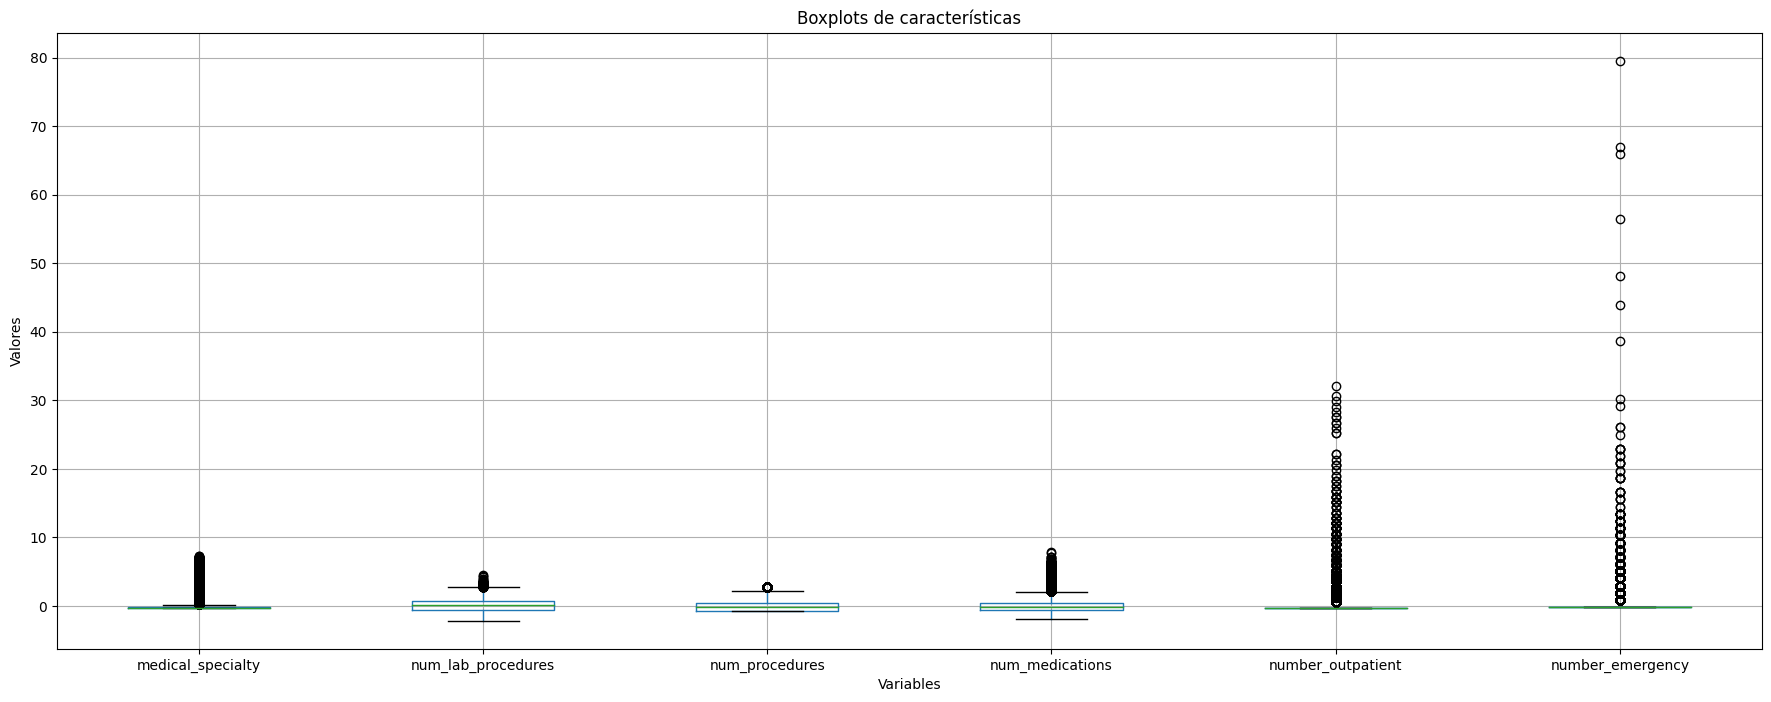

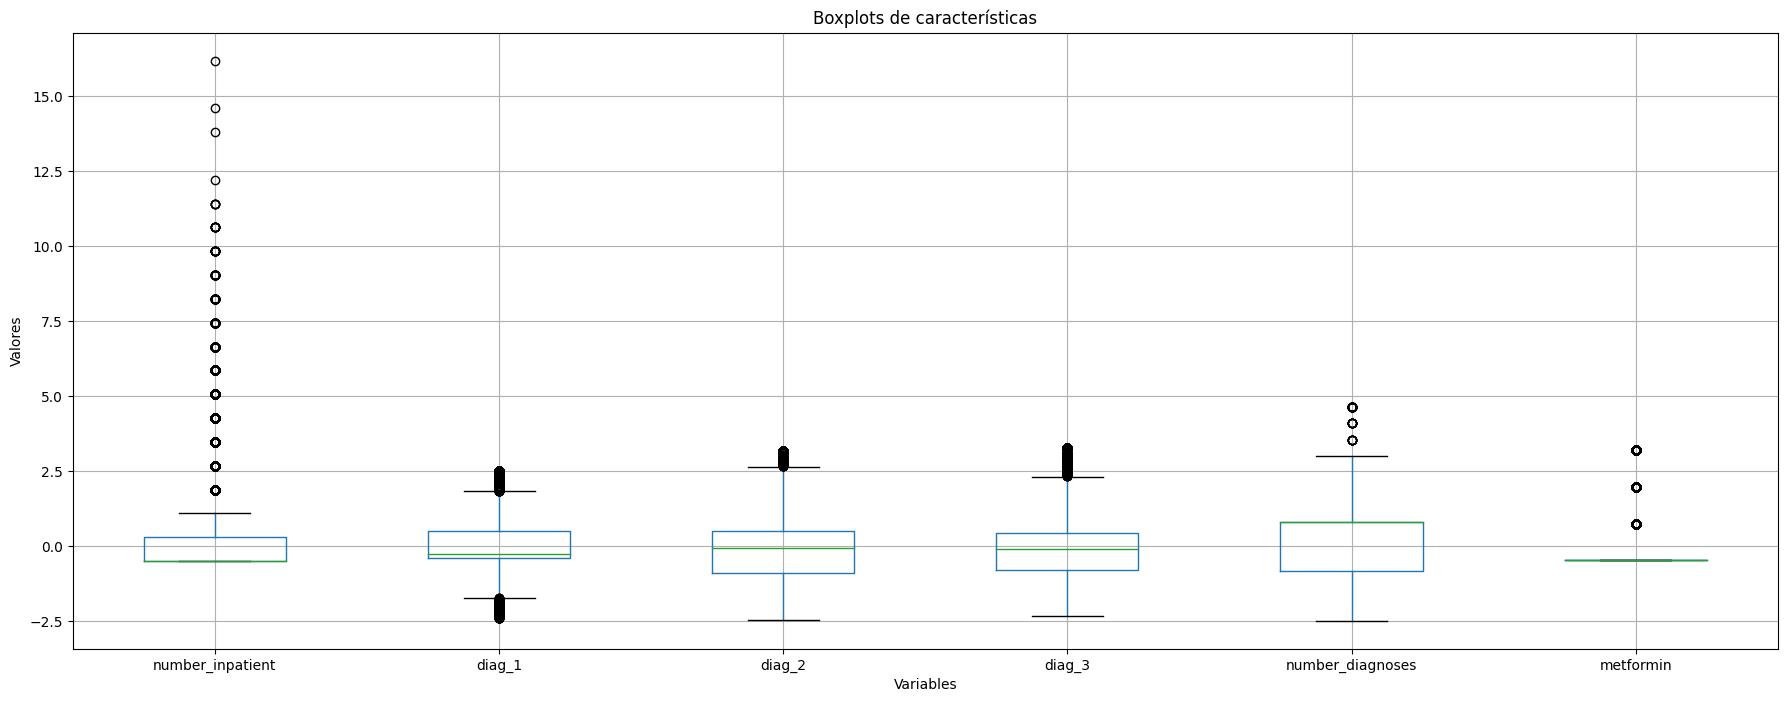

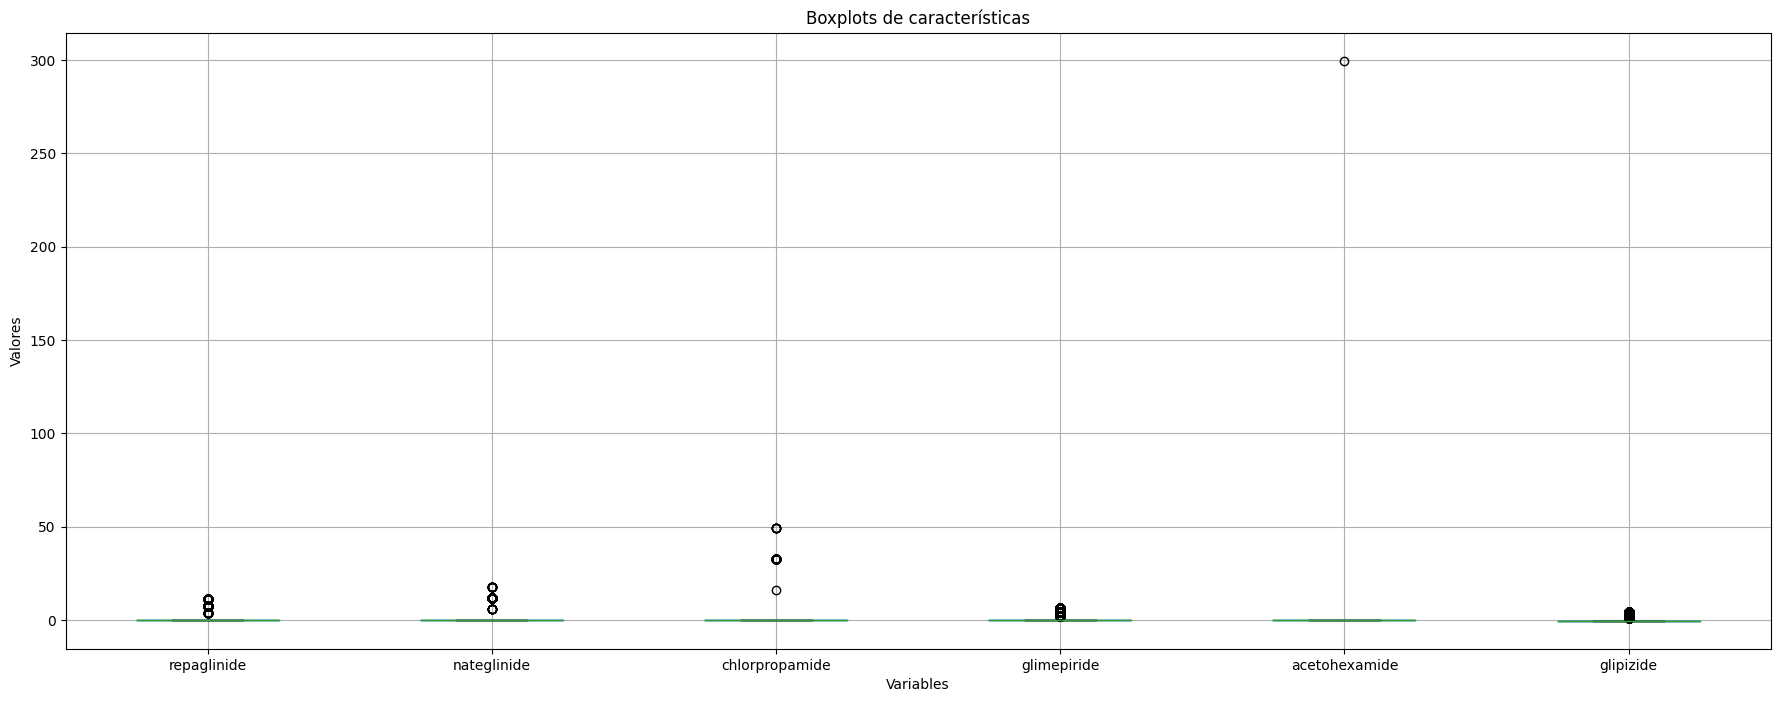

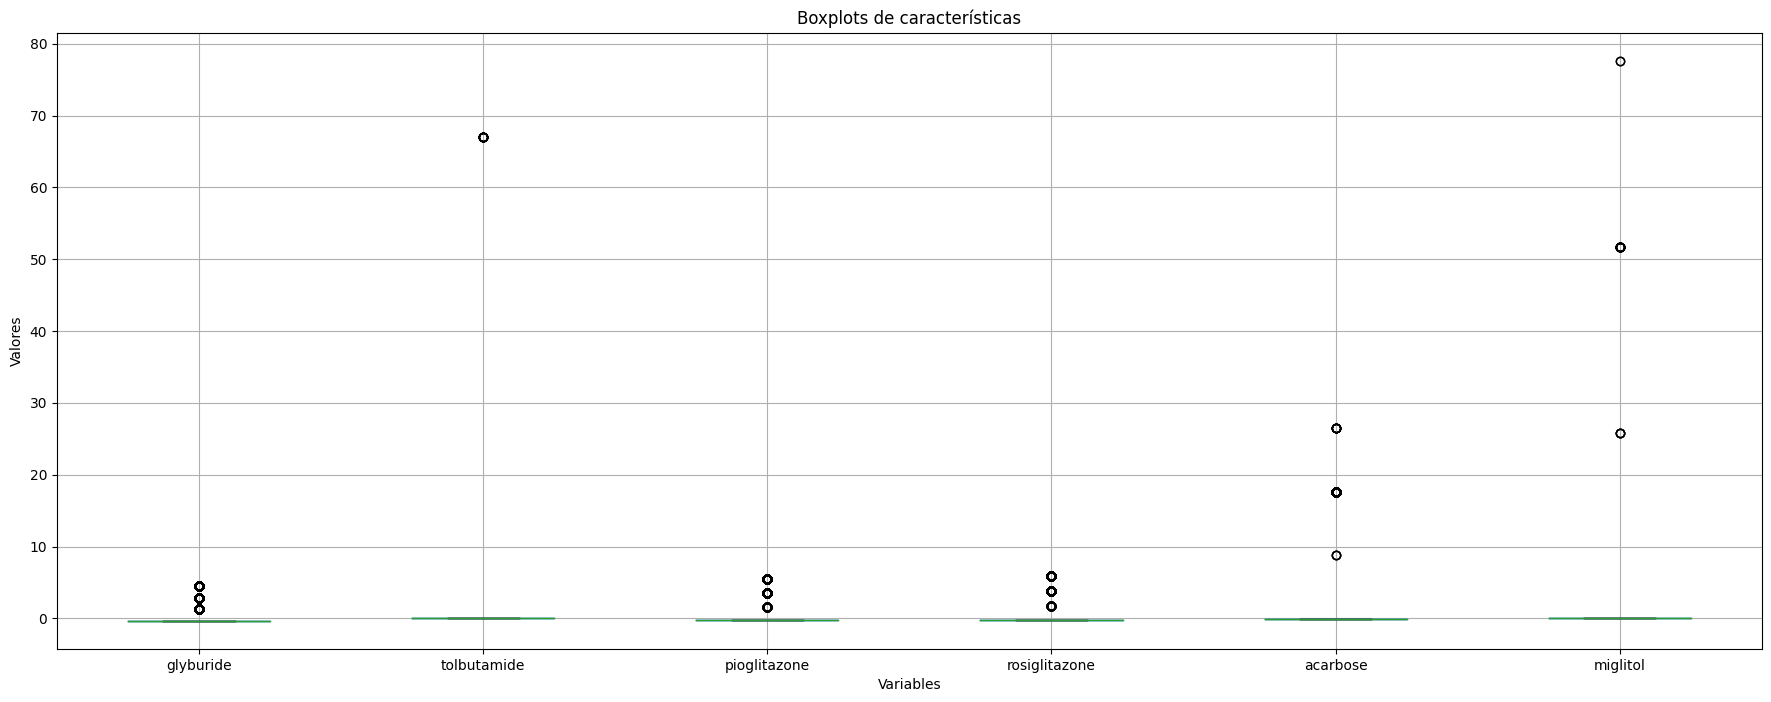

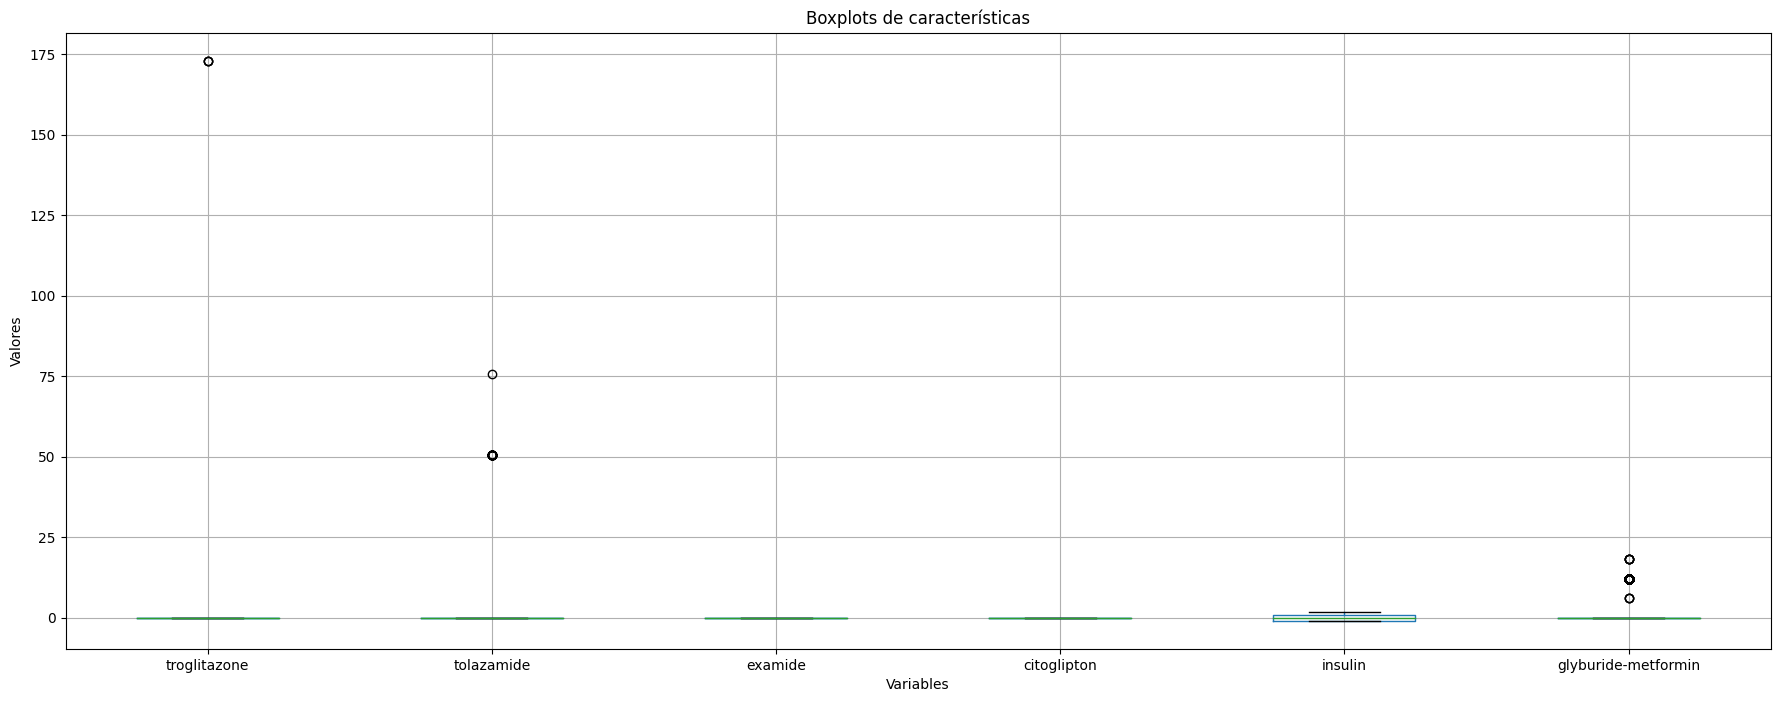

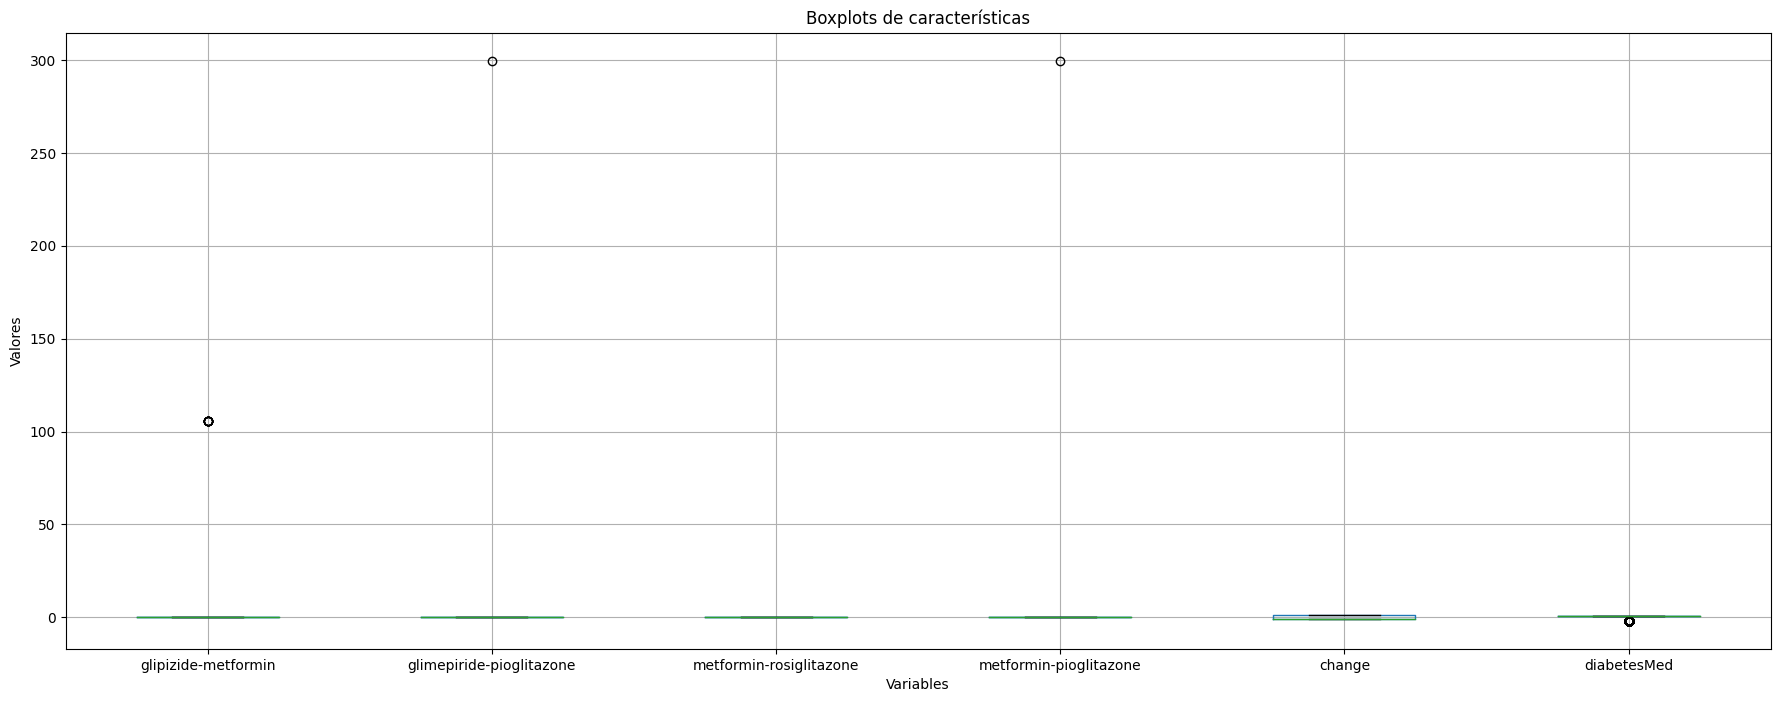

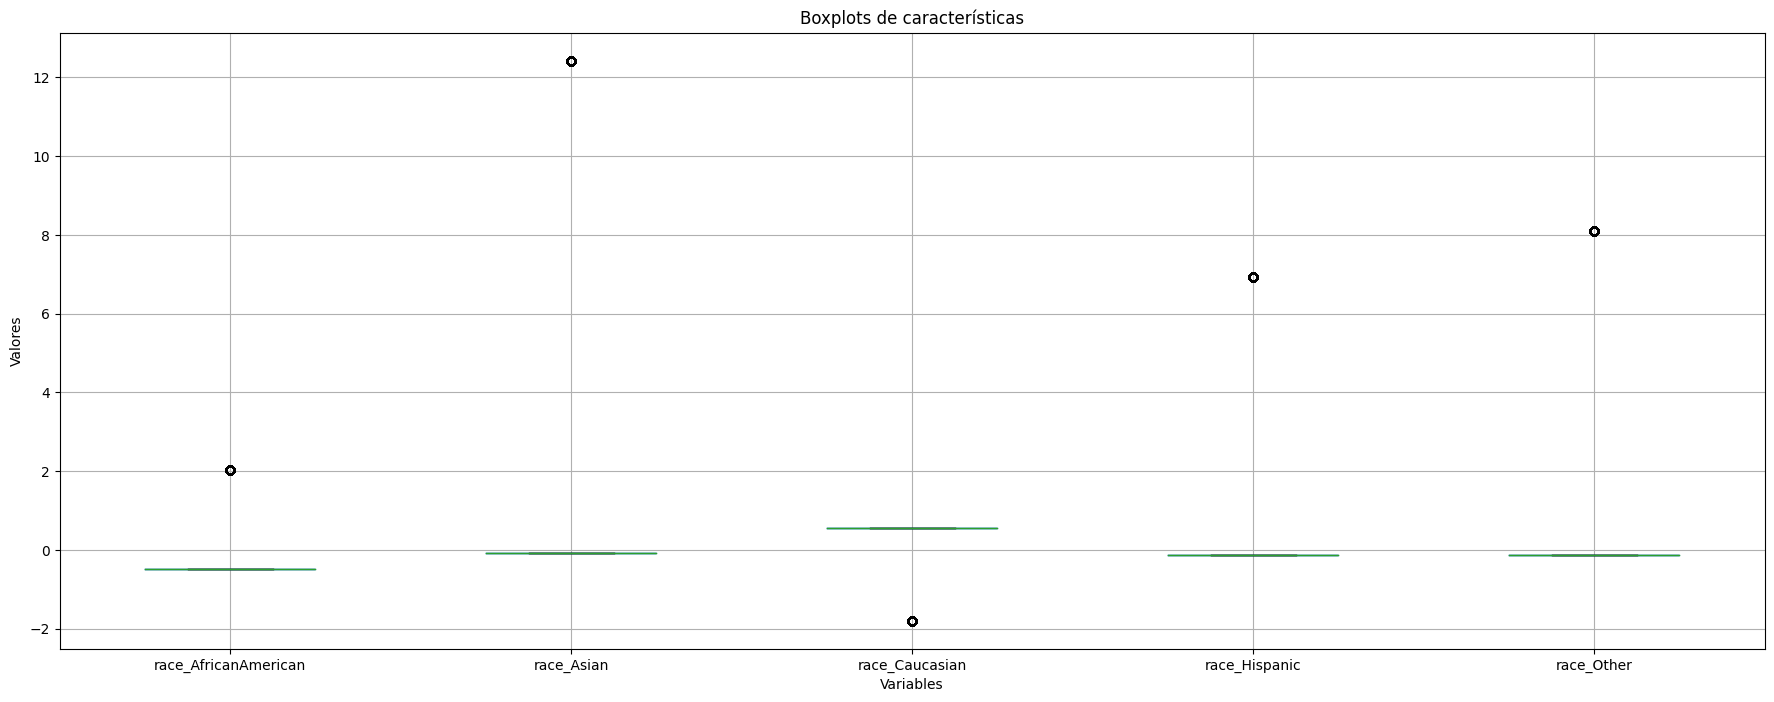

In [106]:
for i in range(0, X_ord.shape[1], 6):
    plt.figure(figsize=(22, 8))
    X_ord.iloc[:, i:i + 6].boxplot()
    plt.title(f'Boxplots de características')
    plt.xlabel('Variables')
    plt.ylabel('Valores')
    plt.grid(True)
    plt.show()

Es complicado sacar conclusiones al ser tantas varacterísticas, pero hay algunas evidentes:

-   En las variables binarias, los valores fuera de la caja son los 0 o 1 menos comunes en cada característica. Cuando la caja va de 0 a 1 es que el número de 0 y 1 es muy similar (gender o change)
- En otras características vemos como hay valores atípicos pero que vamos a considerar como reales, no como errores. Por ejemplo, en medical specialty, la mayoría son de valores son el mismo (con los que hicimos la imputación), por eso la caja está abajo y hay más valores arriba, pero que no podemos descartar al ser reales.
- También debemos considerar el problema, en el cual tenemos más de 80000 instancias.

Por ejemplo, podemos ver el histograma de estas variables donde hay muchos valores fuera de la caja:

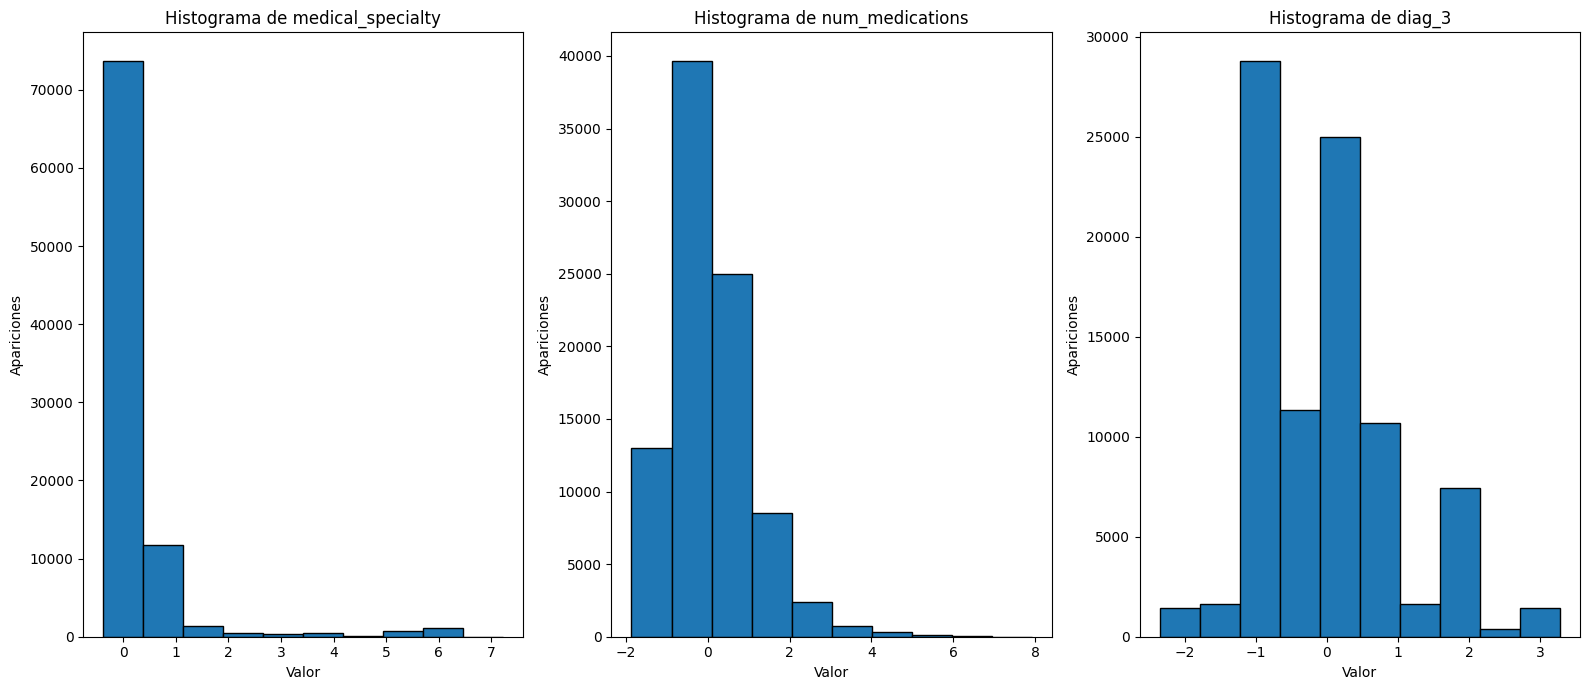

In [107]:
plt.figure(figsize=(16, 7))

plt.subplot(1, 3, 1)  
plt.hist(X_ord['medical_specialty'], edgecolor='black')
plt.title('Histograma de medical_specialty')
plt.xlabel('Valor')
plt.ylabel('Apariciones')

plt.subplot(1, 3, 2)  
plt.hist(X_ord['num_medications'], edgecolor='black')
plt.title('Histograma de num_medications')
plt.xlabel('Valor')
plt.ylabel('Apariciones')

plt.subplot(1, 3, 3)  
plt.hist(X_ord['diag_3'], edgecolor='black')
plt.title('Histograma de diag_3')
plt.xlabel('Valor')
plt.ylabel('Apariciones')

plt.tight_layout()
plt.show()


Aquí vemos por qué hay tantos fuera en los boxplot. Estas variables suelen tomar valores muy concentrados alrededor de un único valor específico

Para X_oh no se hace este estudio pues tenemos más de 100 columnas, además sería todo igual menos en las columnas del one hot.

### Matriz de correlación

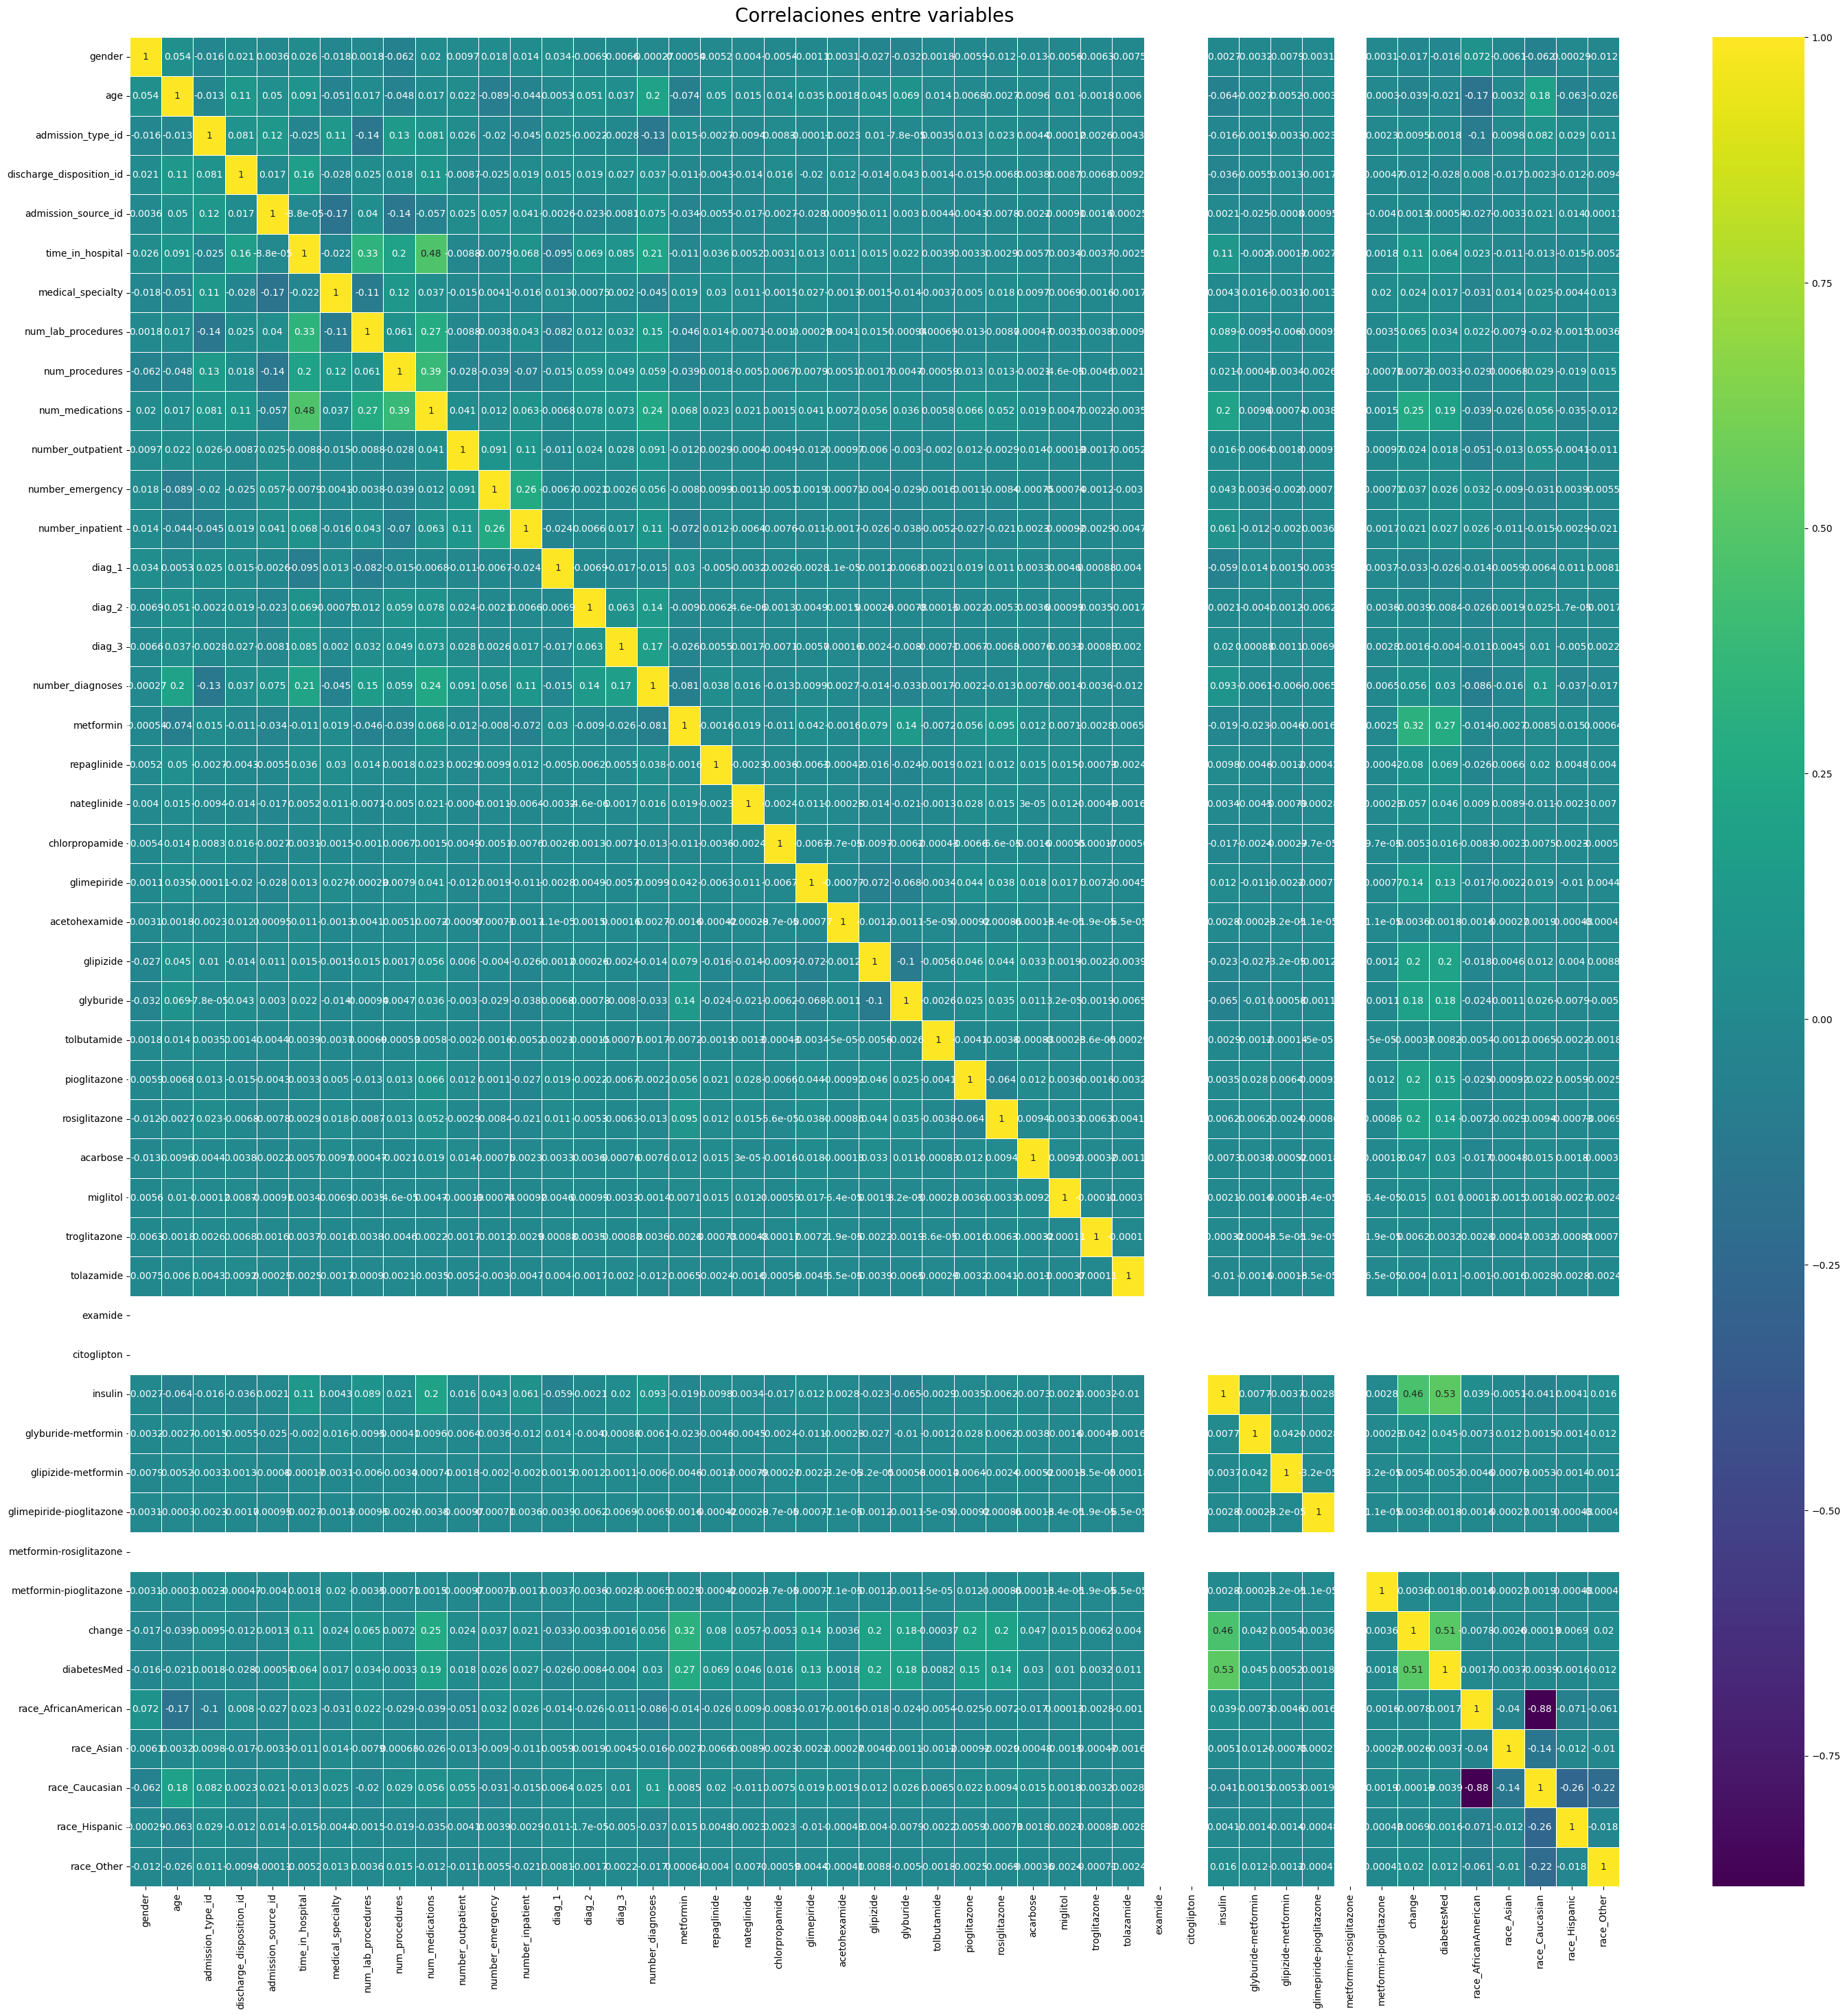

In [108]:

plt.figure(figsize=(35, 35))
heatmap=sns.heatmap(X_ord.corr(), annot=True, cmap='viridis', linewidths=.5)
heatmap.set_title('Correlaciones entre variables', fontdict={'fontsize':20}, pad=16);
plt.show()

Aunque con tantas columnas la visualzación es complicada, observamos que hay 3 variables cuyos elementos son todos el mismo:

In [109]:
X_ord['examide'].value_counts(),X_ord['citoglipton'].value_counts(),X_ord['metformin-rosiglitazone'].value_counts()

(examide
 0.0    89782
 Name: count, dtype: int64,
 citoglipton
 0.0    89782
 Name: count, dtype: int64,
 metformin-rosiglitazone
 0.0    89782
 Name: count, dtype: int64)

Estas no aportarán nada a nuestras predicciones, asi que las eliminamos:

In [110]:
X_ord.drop(columns=['examide','citoglipton','metformin-rosiglitazone'],inplace=True)
X_oh.drop(columns=['examide','citoglipton','metformin-rosiglitazone'],inplace=True)

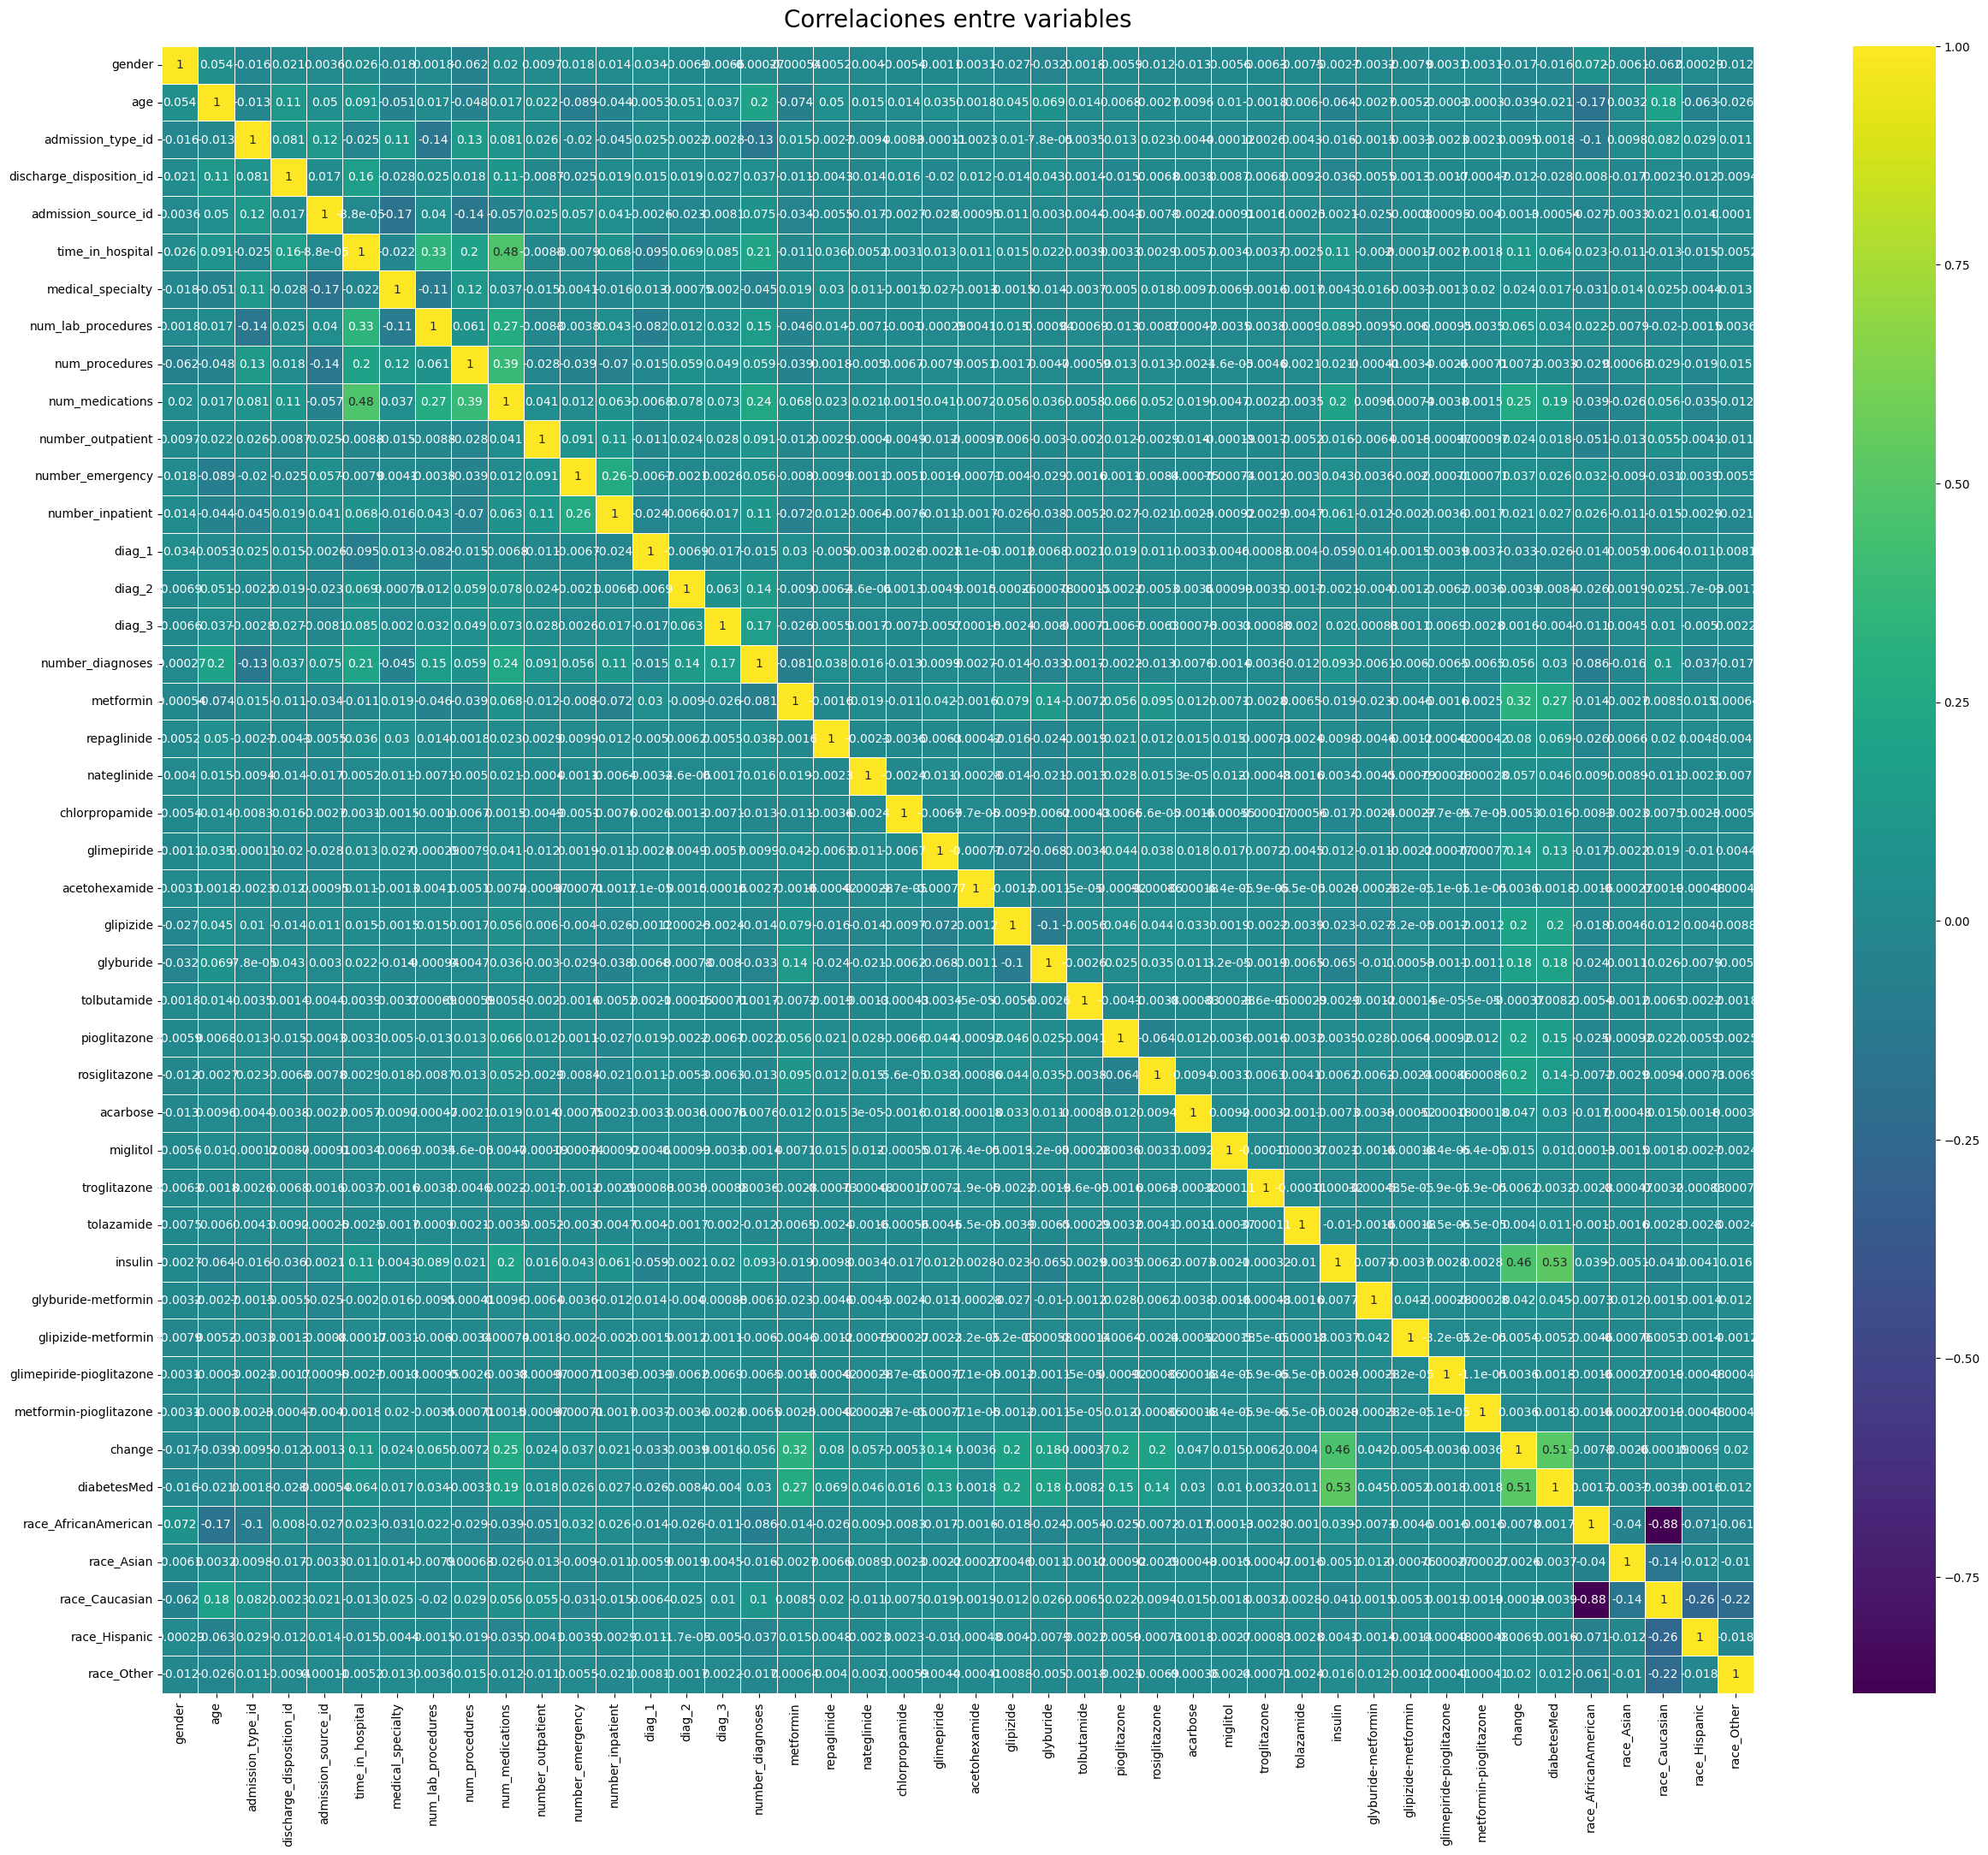

In [111]:
plt.figure(figsize=(30, 25))
heatmap = sns.heatmap(X_ord.corr(), annot=True, cmap='viridis', linewidths=.5)
heatmap.set_title('Correlaciones entre variables', fontdict={'fontsize':20}, pad=16);
plt.show()

Ahora podemos ver que no hay mucha correlación entre variables, si acaso destaca un poco la correlación (inversa en este caso) entre las variables 'race_AfricanAmerican' y 'race_Asian', lo cual vamos a dejar pasar puesto que esta correlacion es obvia, alguien que es afroamericano no es asiático. 

También, vemos que hay algo de correlación (sobre 0.5) entre las variables insulin (si se receto insulina o no, o si la dosis aumento o disminuyo), diabetesMed (Si alguien se diagnostica con diabetes) y change (si hubo cambio en la medicaciópn o no). Evidentemente, la correlación entre insulin y diabetesMed sugiereque los pacientes que tienen diabetes se les suele recetar insulina. La relación entre insulina y change se debe a que un ajuste en la dosis de insulina, provoca un change de 1. 

Con estas consideraciones, no estamos en disposición de ver una fuerte correlación entre variables y así poder eliminar alguna. Podemos ver el scatter plot de estas variables:

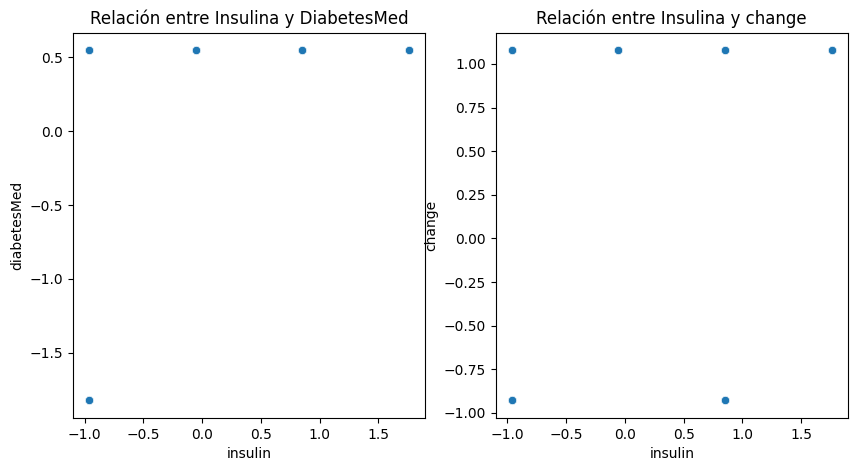

In [112]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.scatterplot(x=X_ord['insulin'], y=X_ord['diabetesMed'])
plt.title('Relación entre Insulina y DiabetesMed')

plt.subplot(1,2,2)
sns.scatterplot(x=X_ord['insulin'], y=X_ord['change'])
plt.title('Relación entre Insulina y change')
plt.show()

Observamos que cuando no se diagnostica diabetes, no se receta insulina. Sin embargo, hay casos en los que se detecta diabetes, pero no se receta insulina. Además, cuando no se receta insulina (insulina=0) o la dosis es constante (insulina=0.8), hay casos en los que no hay cambio (cambio=-1), es decir, tampoco hay cambios en las demas medicinas. Los casos en los que la insulina es constante y sí hay cambio (cambio=1) se deben a otras medicinas.

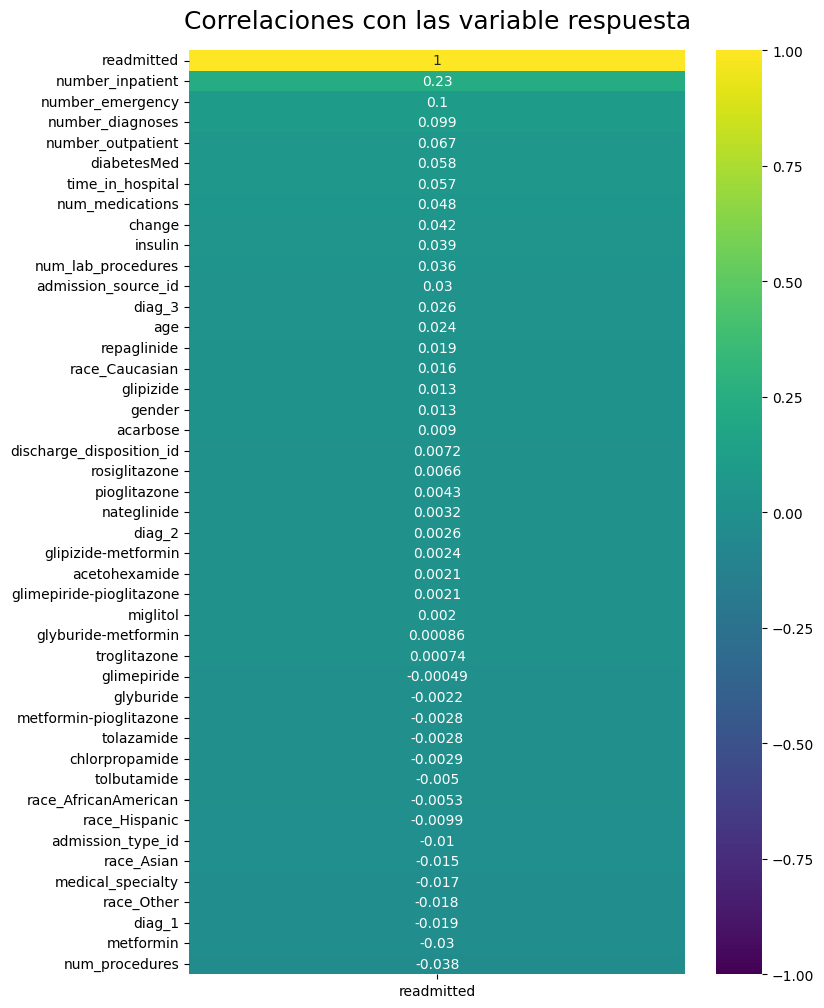

In [113]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(pd.concat([X_ord, y], axis=1).corr()[['readmitted']].sort_values(by='readmitted', ascending=False), vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlaciones con las variable respuesta', fontdict={'fontsize':18}, pad=16);

Vemos como los pacientes que mas ingresos previos han tenido son los que mas probabilidad tienen de ser reingresados. Igual pasa con el número de veces que se ha acudido a urgencias. Al contrario, el uso de metformina está negativamente correlacionado con el ingreso, igual que el diagnóstico primero que s ehace al paciente. Por otro lado, la mayoría de los medicamentos específicos (como glimepiride, tolazamide, glyburide) tienen correlaciones muy bajas o cercanas a cero, lo que indica que no hay una relación fuerte entre estos medicamentos y la probabilidad de reingreso.Igual pasa con el género del paciente, lo que sugiere que no hay una diferencia significativa en la tasa de reingreso entre hombres y mujeres.



Con estas consideraciones,  estamos en disposición de eliminar algunas variables, por ejemplo las variables que no están relacionadas con la respuesta, como glimepiride,troglitazone,glyburide-metformin. Además, sobre las razas vemos que la caucásica está más relacionada simplemente porque la mayoría de registros son de pacientes caucásicos. 

In [114]:
X_ord2=X_ord.copy()
X_oh2=X_oh.copy()

X_ord2.drop(columns=['glimepiride','troglitazone','glyburide-metformin'],inplace=True)
X_oh2.drop(columns=['glimepiride','troglitazone','glyburide-metformin'],inplace=True)

### Método de envoltura

Podemos seguir con la selección de características usando métodos de envoltura:

In [115]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
rfe=RFE(estimator=model,n_features_to_select=5)

rfe.fit(X_ord2, y)

print(rfe.ranking_)


[18  8  9  1 21  3 27 17  4 16  2  1  1 10 25 14  1  5 28 37 24 15 32 30
 31 11 12 22 33 36  6 34 20 23  7  1 35 13 26 29 19]


Con este estudio, que coincide en gran parte con el mostrado en la correlación con la variable de características, podemos eliminar la última característica (de momento), que no aportará nada al problema. Aunque todo este estudio lo hacemos sobre X_ord2, en X_oh2 también la eliminamos, ya que sería análogo.

In [119]:
X_ord2.columns[-22]

'nateglinide'

In [120]:
X_ord2.drop(columns=['nateglinide'],inplace=True)
X_oh2.drop(columns=['nateglinide'],inplace=True)

Recapitulando, y antes de entrenar a los distintos modelos, recapitulamos:

- X_ord: df donde los valores categóricos de medical_specialty se han cambiado por números, introduciendo ordinalidad artificial
- X_oh: df donde los valores categóricos de medical_specialty se han cambiado por vectores one-hot, aumentando la dimensionalidad
- X_ord2: igual que X_ord pero con selección de características, eliminando varias columnas
- X_oh2: igual que X_oh pero con selección de características, eliminando varias columnas

In [121]:
X_ord.shape,X_ord2.shape,X_oh.shape,X_oh2.shape

((89782, 44), (89782, 40), (89782, 114), (89782, 110))

## Entrenamiento de modelos

Con estos datos, entrenaremos tres modelos:

- Logistic Regression multinomial
- Random Forest
- Decision Trees

### Datos con selección de características

En esta parte usaremos los datos a los cuales se le han eliminado columnas en la selección de características

#### LR Multinomial

In [122]:
def rendimiento(clasificador, X, y):
    
    y_pred = clasificador.predict(X)
    
    accuracy=accuracy_score(y,y_pred)

    print("Precisión del modelo: {}".format(accuracy))
    print()
    print("Reporte de Clasificación:")
    print(classification_report(y, y_pred))
    
    return accuracy

In [123]:
X_ord2_train, X_ord2_testval, y_ord2_train, y_ord2_testval = train_test_split(X_ord2, y, test_size=0.2, random_state=4,stratify=y)
X_ord2_test, X_ord2_val, y_ord2_test, y_ord2_val= train_test_split(X_ord2_testval, y_ord2_testval, 
                                                                   test_size=0.5, random_state=2,stratify=y_ord2_testval)

In [124]:
tipos=['ovr','multinomial']

mejor_accuracy = 0
parámetros = {}

for tipo in tipos:
        model = LogisticRegression(multi_class=tipo, solver='lbfgs', max_iter=1000)
        model.fit(X_ord2_train, y_ord2_train)

        accuracy = accuracy_score(y_ord2_val, model.predict(X_ord2_val))

        if accuracy > mejor_accuracy:
            mejor_accuracy = accuracy
            parámetros = {'multi_class': tipo}

print(f"Mejores parámetros: {parámetros}")
print(f"Precisión: {mejor_accuracy}")



Mejores parámetros: {'multi_class': 'ovr'}
Precisión: 0.5638712551509076


Ahora sacamos el rendimiento del conjunto de test:

In [125]:
lr_model_ord2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr_model_ord2.fit(X_ord2_train, y_ord2_train)

lr_ord2_accuracy=rendimiento(lr_model_ord2,X_ord2_test,y_ord2_test)

Precisión del modelo: 0.5677210960124749

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.58      0.90      0.71      4790
         1.0       0.50      0.25      0.33      3179
         2.0       0.29      0.01      0.01      1009

    accuracy                           0.57      8978
   macro avg       0.46      0.38      0.35      8978
weighted avg       0.52      0.57      0.50      8978



Ahora probamos con los codificados one-hot:

In [126]:
X_oh2_train, X_oh2_testval, y_oh2_train, y_oh2_testval = train_test_split(X_oh2, y, test_size=0.2, random_state=4,stratify=y)
X_oh2_test, X_oh2_val, y_oh2_test, y_oh2_val= train_test_split(X_oh2_testval, y_oh2_testval, 
                                                                   test_size=0.5, random_state=2,stratify=y_oh2_testval)

In [127]:
tipos=['ovr','multinomial']

mejor_accuracy = 0
parámetros = {}

for tipo in tipos:
        model = LogisticRegression(multi_class=tipo, solver='lbfgs', max_iter=1000)
        model.fit(X_oh2_train, y_oh2_train)

        accuracy = accuracy_score(y_oh2_val, model.predict(X_oh2_val))

        if accuracy > mejor_accuracy:
            mejor_accuracy = accuracy
            parámetros = {'multi_class': tipo}

print(f"Mejores parámetros: {parámetros}")
print(f"Precisión: {mejor_accuracy}")

Mejores parámetros: {'multi_class': 'ovr'}
Precisión: 0.5639826261276312


In [128]:
lr_model_oh2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr_model_oh2.fit(X_oh2_train, y_oh2_train)

lr_oh2_accuracy=rendimiento(lr_model_oh2,X_oh2_test,y_oh2_test)

Precisión del modelo: 0.5676097126308755

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.58      0.89      0.71      4790
         1.0       0.50      0.25      0.34      3179
         2.0       0.24      0.01      0.01      1009

    accuracy                           0.57      8978
   macro avg       0.44      0.38      0.35      8978
weighted avg       0.52      0.57      0.50      8978



#### Random Forest

In [129]:
estimators= [200, 300]
samples = [2,3]

mejor_accuracy = 0
parámetros = {}

for estimator in estimators:
        for sample in samples:
            model = RandomForestClassifier(n_estimators=estimator, min_samples_split=sample, random_state=2)
            model.fit(X_ord2_train, y_ord2_train)

            accuracy = accuracy_score(y_ord2_val, model.predict(X_ord2_val))

            if accuracy > mejor_accuracy:
                mejor_accuracy = accuracy
                parámetros = {'estimators': estimator,'min_samples':sample}

print(f"Mejores parámetros: {parámetros}")
print(f"Precisión: {mejor_accuracy}")

Mejores parámetros: {'estimators': 300, 'min_samples': 3}
Precisión: 0.5771244013810001


In [130]:
RF_model_ord2=model = RandomForestClassifier(n_estimators=300, min_samples_split=3, random_state=2)
RF_model_ord2.fit(X_ord2_train, y_ord2_train)

RF_ord2_accuracy=rendimiento(RF_model_ord2,X_ord2_test,y_ord2_test)

Precisión del modelo: 0.5839830697259969

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.61      0.84      0.71      4790
         1.0       0.52      0.38      0.44      3179
         2.0       0.41      0.01      0.02      1009

    accuracy                           0.58      8978
   macro avg       0.51      0.41      0.39      8978
weighted avg       0.55      0.58      0.53      8978



In [131]:
estimators= [200, 300]
samples = [2,3]

mejor_accuracy = 0
parámetros = {}

for estimator in estimators:
        for sample in samples:
            model = RandomForestClassifier(n_estimators=estimator, min_samples_split=sample, random_state=2)
            model.fit(X_oh2_train, y_oh2_train)

            accuracy = accuracy_score(y_oh2_val, model.predict(X_oh2_val))

            if accuracy > mejor_accuracy:
                mejor_accuracy = accuracy
                parámetros = {'estimators': estimator,'min_samples':sample}

print(f"Mejores parámetros: {parámetros}")
print(f"Precisión: {mejor_accuracy}")

Mejores parámetros: {'estimators': 300, 'min_samples': 3}
Precisión: 0.5771244013810001


In [132]:
RF_model_oh2=model = RandomForestClassifier(n_estimators=300, min_samples_split=3, random_state=2)
RF_model_oh2.fit(X_oh2_train, y_oh2_train)

RF_oh2_accuracy=rendimiento(RF_model_oh2,X_oh2_test,y_oh2_test)

Precisión del modelo: 0.585208286923591

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.61      0.85      0.71      4790
         1.0       0.52      0.37      0.44      3179
         2.0       0.42      0.00      0.01      1009

    accuracy                           0.59      8978
   macro avg       0.51      0.41      0.38      8978
weighted avg       0.56      0.59      0.53      8978



#### Decision Tree

In [133]:
max_depths=[None,10,20,30,40]
min_samples=[2,3,4,5]

mejor_accuracy = 0
parámetros = {}

for max_depth in max_depths:
        for sample in min_samples:
            model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=sample, random_state=2)
            model.fit(X_ord2_train, y_ord2_train)

            accuracy = accuracy_score(y_ord2_val, model.predict(X_ord2_val))

            if accuracy > mejor_accuracy:
                mejor_accuracy = accuracy
                parámetros = {'max_depth': max_depth,'min_samples':sample}

print(f"Mejores parámetros: {parámetros}")
print(f"Precisión: {mejor_accuracy}")

Mejores parámetros: {'max_depth': 10, 'min_samples': 4}
Precisión: 0.5615324646397148


In [134]:
DT_model_ord2=model = DecisionTreeClassifier(max_depth=10, min_samples_split=4, random_state=2)
DT_model_ord2.fit(X_ord2_train, y_ord2_train)

DT_ord2_accuracy=rendimiento(DT_model_ord2,X_ord2_test,y_ord2_test)

Precisión del modelo: 0.5718422811316551

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.62      0.78      0.69      4790
         1.0       0.48      0.43      0.46      3179
         2.0       0.31      0.03      0.05      1009

    accuracy                           0.57      8978
   macro avg       0.47      0.41      0.40      8978
weighted avg       0.54      0.57      0.53      8978



In [135]:
max_depths=[None,10,20,30,40]
min_samples=[2,3,4,5]

mejor_accuracy = 0
parámetros = {}

for max_depth in max_depths:
        for sample in min_samples:
            model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=sample, random_state=2)
            model.fit(X_oh2_train, y_oh2_train)

            accuracy = accuracy_score(y_oh2_val, model.predict(X_oh2_val))

            if accuracy > mejor_accuracy:
                mejor_accuracy = accuracy
                parámetros = {'max_depth': max_depth,'min_samples':sample}

print(f"Mejores parámetros: {parámetros}")
print(f"Precisión: {mejor_accuracy}")

Mejores parámetros: {'max_depth': 10, 'min_samples': 2}
Precisión: 0.561086980732821


In [136]:
DT_model_oh2=model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=2)
DT_model_oh2.fit(X_oh2_train, y_oh2_train)

DT_oh2_accuracy=rendimiento(DT_model_oh2,X_oh2_test,y_oh2_test)

Precisión del modelo: 0.5732902650924482

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.62      0.78      0.69      4790
         1.0       0.49      0.44      0.46      3179
         2.0       0.28      0.03      0.05      1009

    accuracy                           0.57      8978
   macro avg       0.46      0.41      0.40      8978
weighted avg       0.53      0.57      0.54      8978



### Datos sin selección de características

#### LR Multinomial

In [137]:
X_ord_train, X_ord_testval, y_ord_train, y_ord_testval = train_test_split(X_ord, y, test_size=0.2, random_state=4,stratify=y)
X_ord_test, X_ord_val, y_ord_test, y_ord_val= train_test_split(X_ord_testval, y_ord_testval, 
                                                                   test_size=0.5, random_state=2,stratify=y_ord_testval)

In [138]:

tipos=['ovr','multinomial']

mejor_accuracy = 0
parámetros = {}

for tipo in tipos:
        model = LogisticRegression(multi_class=tipo, solver='lbfgs', max_iter=1000)
        model.fit(X_ord_train, y_ord_train)

        accuracy = accuracy_score(y_ord_val, model.predict(X_ord_val))

        if accuracy > mejor_accuracy:
            mejor_accuracy = accuracy
            parámetros = {'multi_class': tipo}

print(f"Mejores parámetros: {parámetros}")
print(f"Precisión: {mejor_accuracy}")


Mejores parámetros: {'multi_class': 'multinomial'}
Precisión: 0.5639826261276312


In [139]:

lr_model_ord = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr_model_ord.fit(X_ord_train, y_ord_train)

lr_ord_accuracy=rendimiento(lr_model_ord,X_ord_test,y_ord_test)



Precisión del modelo: 0.5678324793940744

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.58      0.90      0.71      4790
         1.0       0.50      0.25      0.33      3179
         2.0       0.29      0.01      0.01      1009

    accuracy                           0.57      8978
   macro avg       0.46      0.38      0.35      8978
weighted avg       0.52      0.57      0.50      8978



In [140]:
X_oh_train, X_oh_testval, y_oh_train, y_oh_testval = train_test_split(X_oh, y, test_size=0.2, random_state=4,stratify=y)
X_oh_test, X_oh_val, y_oh_test, y_oh_val= train_test_split(X_oh_testval, y_oh_testval, 
                                                                   test_size=0.5, random_state=2,stratify=y_oh_testval)

In [141]:


tipos=['ovr','multinomial']

mejor_accuracy = 0
parámetros = {}

for tipo in tipos:
        model = LogisticRegression(multi_class=tipo, solver='lbfgs', max_iter=1000)
        model.fit(X_oh_train, y_oh_train)

        accuracy = accuracy_score(y_oh_val, model.predict(X_oh_val))

        if accuracy > mejor_accuracy:
            mejor_accuracy = accuracy
            parámetros = {'multi_class': tipo}

print(f"Mejores parámetros: {parámetros}")
print(f"Precisión: {mejor_accuracy}")


Mejores parámetros: {'multi_class': 'ovr'}
Precisión: 0.5637598841741842


In [142]:


lr_model_oh = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr_model_oh.fit(X_oh_train, y_oh_train)

lr_oh_accuracy=rendimiento(lr_model_oh,X_oh_test,y_oh_test)

Precisión del modelo: 0.5678324793940744

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.58      0.89      0.71      4790
         1.0       0.50      0.25      0.34      3179
         2.0       0.24      0.01      0.01      1009

    accuracy                           0.57      8978
   macro avg       0.44      0.39      0.35      8978
weighted avg       0.52      0.57      0.50      8978



#### Random Forest

In [143]:
estimators= [200, 300]
samples = [2,3]

mejor_accuracy = 0
parámetros = {}

for estimator in estimators:
        for sample in samples:
            model = RandomForestClassifier(n_estimators=estimator, min_samples_split=sample, random_state=2)
            model.fit(X_ord_train, y_ord_train)

            accuracy = accuracy_score(y_ord_val, model.predict(X_ord_val))

            if accuracy > mejor_accuracy:
                mejor_accuracy = accuracy
                parámetros = {'estimators': estimator,'min_samples':sample}

print(f"Mejores parámetros: {parámetros}")
print(f"Precisión: {mejor_accuracy}")

Mejores parámetros: {'estimators': 300, 'min_samples': 3}
Precisión: 0.5799086757990868


In [144]:
RF_model_ord=model = RandomForestClassifier(n_estimators=300, min_samples_split=3, random_state=2)
RF_model_ord.fit(X_ord_train, y_ord_train)

RF_ord_accuracy=rendimiento(RF_model_ord,X_ord_test,y_ord_test)

Precisión del modelo: 0.5834261528179996

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.61      0.84      0.71      4790
         1.0       0.51      0.38      0.44      3179
         2.0       0.42      0.01      0.02      1009

    accuracy                           0.58      8978
   macro avg       0.51      0.41      0.39      8978
weighted avg       0.55      0.58      0.53      8978



In [145]:
estimators= [200, 300]
samples = [2,3]

mejor_accuracy = 0
parámetros = {}

for estimator in estimators:
        for sample in samples:
            model = RandomForestClassifier(n_estimators=estimator, min_samples_split=sample, random_state=2)
            model.fit(X_oh_train, y_oh_train)

            accuracy = accuracy_score(y_oh_val, model.predict(X_oh_val))

            if accuracy > mejor_accuracy:
                mejor_accuracy = accuracy
                parámetros = {'estimators': estimator,'min_samples':sample}

print(f"Mejores parámetros: {parámetros}")
print(f"Precisión: {mejor_accuracy}")

Mejores parámetros: {'estimators': 300, 'min_samples': 2}
Precisión: 0.5787949660318521


In [147]:
RF_model_oh=model = RandomForestClassifier(n_estimators=300, min_samples_split=2, random_state=2)
RF_model_oh.fit(X_oh_train, y_oh_train)

RF_oh_accuracy=rendimiento(RF_model_oh,X_oh_test,y_oh_test)

Precisión del modelo: 0.5833147694364

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.61      0.84      0.71      4790
         1.0       0.52      0.37      0.43      3179
         2.0       0.33      0.01      0.01      1009

    accuracy                           0.58      8978
   macro avg       0.49      0.41      0.38      8978
weighted avg       0.54      0.58      0.53      8978



#### Árboles decisión

In [148]:
max_depths=[None,10,20,30,40]
min_samples=[2,3,4,5]

mejor_accuracy = 0
parámetros = {}

for max_depth in max_depths:
        for sample in min_samples:
            model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=sample, random_state=2)
            model.fit(X_ord_train, y_ord_train)

            accuracy = accuracy_score(y_ord_val, model.predict(X_ord_val))

            if accuracy > mejor_accuracy:
                mejor_accuracy = accuracy
                parámetros = {'max_depth': max_depth,'min_samples':sample}

print(f"Mejores parámetros: {parámetros}")
print(f"Precisión: {mejor_accuracy}")

Mejores parámetros: {'max_depth': 10, 'min_samples': 5}
Precisión: 0.5609756097560976


In [149]:
DT_model_ord=model = DecisionTreeClassifier(max_depth=10, min_samples_split=3, random_state=2)
DT_model_ord.fit(X_ord_train, y_ord_train)

DT_ord_accuracy=rendimiento(DT_model_ord,X_ord_test,y_ord_test)

Precisión del modelo: 0.572287814658053

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.62      0.78      0.69      4790
         1.0       0.48      0.43      0.46      3179
         2.0       0.33      0.03      0.05      1009

    accuracy                           0.57      8978
   macro avg       0.48      0.41      0.40      8978
weighted avg       0.54      0.57      0.53      8978



In [150]:
max_depths=[None,10,20,30,40]
min_samples=[2,3,4,5]

mejor_accuracy = 0
parámetros = {}

for max_depth in max_depths:
        for sample in min_samples:
            model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=sample, random_state=2)
            model.fit(X_oh_train, y_oh_train)

            accuracy = accuracy_score(y_oh_val, model.predict(X_oh_val))

            if accuracy > mejor_accuracy:
                mejor_accuracy = accuracy
                parámetros = {'max_depth': max_depth,'min_samples':sample}

print(f"Mejores parámetros: {parámetros}")
print(f"Precisión: {mejor_accuracy}")

Mejores parámetros: {'max_depth': 10, 'min_samples': 4}
Precisión: 0.561309722686268


In [151]:
DT_model_oh=model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=2)
DT_model_oh.fit(X_oh_train, y_oh_train)

DT_oh_accuracy=rendimiento(DT_model_oh,X_oh_test,y_oh_test)

Precisión del modelo: 0.5732902650924482

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.62      0.78      0.69      4790
         1.0       0.49      0.44      0.46      3179
         2.0       0.27      0.02      0.05      1009

    accuracy                           0.57      8978
   macro avg       0.46      0.41      0.40      8978
weighted avg       0.53      0.57      0.54      8978



## Resultados

In [152]:
modelos=["RL ord2","RL oh2","RF ord2","RF oh2","DT ord2","DT oh2","RL ord","RL oh","RF ord","RF oh","DT ord","DT oh"]
accuracys=[lr_ord2_accuracy,lr_oh2_accuracy,RF_ord2_accuracy,RF_oh2_accuracy,DT_ord2_accuracy,DT_oh2_accuracy,
           lr_ord_accuracy,lr_oh_accuracy,RF_ord_accuracy,RF_oh_accuracy,DT_ord_accuracy,DT_oh_accuracy]

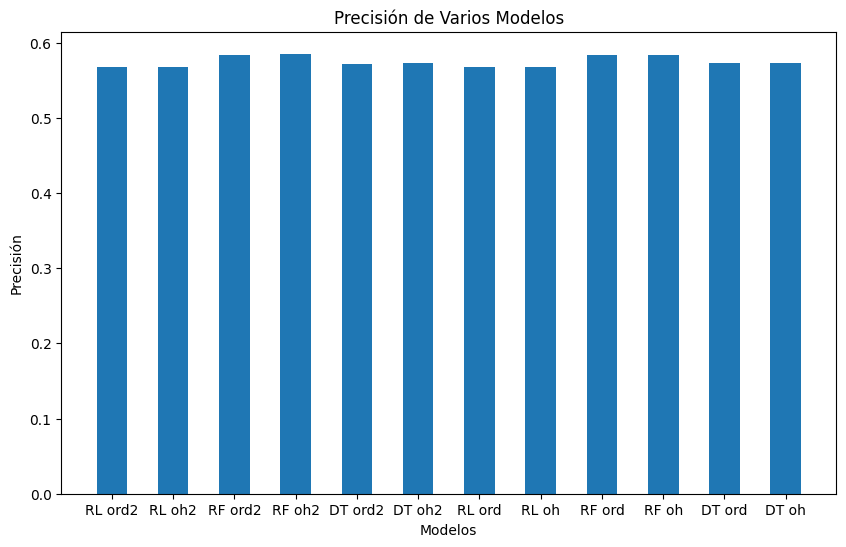

In [153]:
plt.figure(figsize=(10, 6))
plt.bar(modelos, accuracys,width=0.5)
plt.title('Precisión de Varios Modelos')
plt.xlabel('Modelos')
plt.ylabel('Precisión')

plt.show()


In [154]:
print("El mejor modelo sería el Random Forest con datos en one-hot")
rendimiento(RF_model_oh2,X_oh2_test,y_oh2_test)

El mejor modelo sería el Random Forest con datos en one-hot
Precisión del modelo: 0.585208286923591

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.61      0.85      0.71      4790
         1.0       0.52      0.37      0.44      3179
         2.0       0.42      0.00      0.01      1009

    accuracy                           0.59      8978
   macro avg       0.51      0.41      0.38      8978
weighted avg       0.56      0.59      0.53      8978



0.585208286923591

Lo primero que vemos es mucha igualdad entre modelos. Prácticamente sale igual con mayor dimension o menos. También parece que no es muy importante cómo se trata la 'medical_specialty', pues con one-hot o con ordinalidad obtenemos resultados parecidos.

Como vemos, el recall de la clase 2 (reingreso en menos de 30 dias) es prácticamente, osea, el modelo identificó correctamente el 1% de todas las muestras que realmente pertenecían a la clase 2. Vemos la matriz de confusión:

In [155]:
cm = confusion_matrix(y_oh2_test, RF_model_oh2.predict(X_oh2_test))

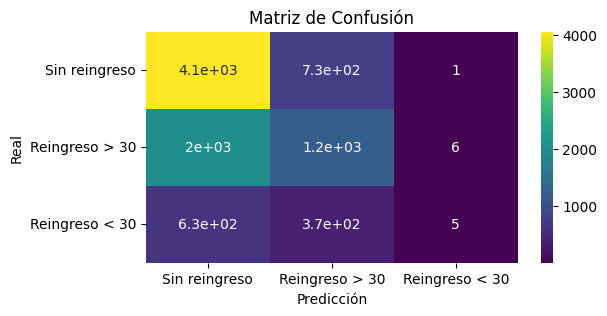

In [156]:
plt.figure(figsize=(6, 3))
sns.heatmap(cm, cmap='viridis', annot=True,xticklabels=["Sin reingreso","Reingreso > 30","Reingreso < 30"], yticklabels=["Sin reingreso","Reingreso > 30","Reingreso < 30"])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')

plt.show()

Como vemos, el modelo no clasifica casi nunca nada como reingreso en menos de 30 dias. Esto es un problema, puede ser debido a la calidad de los datos (es la clase menos representada), a un mal procesado o a una mala elección de modelos, lo cual parece improbable pues se han probado 3 modelos y sus rendimientos son similares. 

Aparte, clasifica muy bien la clase de No reingreso y peor la de reingreso en más de 30 días. 

Si vemos esta matriz con otro modelo:

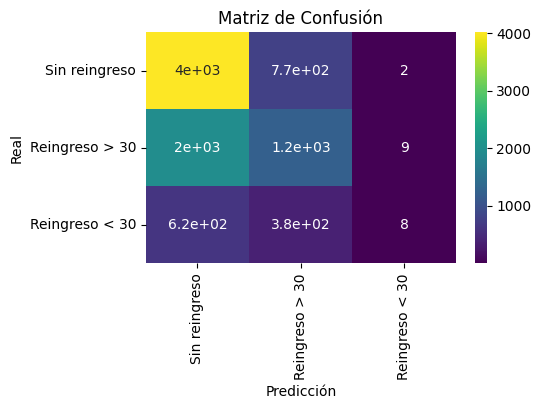

In [157]:
cm = confusion_matrix(y_ord_test, RF_model_ord.predict(X_ord_test))
plt.figure(figsize=(5, 3))
sns.heatmap(cm, cmap='viridis', annot=True,xticklabels=["Sin reingreso","Reingreso > 30","Reingreso < 30"], yticklabels=["Sin reingreso","Reingreso > 30","Reingreso < 30"])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')

plt.show()

Se observa que los resultados son muy parecidos. Como conclusión, primero se han introducido valores faltantes y se han sustituido valores categóricos por numéricos, mediante dos técnicas: one hot y ordinales. Después, en la selección de características, se han eliminado algunas variables no representativas, pero así la mejora ha sido muy corta. Para encontrar el mejor modelo, se han probado tres distintos, utilizando el conjunto de validación para encontrar hiperparámetros. Finalmente, se evalúan los conjuntos de test, obteniendo el mejor rendimiento el modelo de random forest entrenado con datos ordinales en la variable medical_specialty. Cabe destacar la dificultad de los datos, con muchos valores faltantes, muchas variables categóricas, variables no representativas, desbalanceo, etc.